# Lead Scoring Case Study

This assignment is a programming assignment wherein we have built a Logistic regression model for assigning a new lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

#### Problem Statment

An EdTech company named as X Education needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Importing necessary modules

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### To view full columns/details, setting below options

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1 - Importing and understanding the data

-Importing the data set ("leads.csv") and performing basic checks on the data frame to understand the type of data, value and volume of data. Also checking if there are any null values or duplicate values present in the data set.

In [4]:
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

Prospect ID  Lead Number              Lead Origin     Lead Source Do Not Email Do Not Call  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity Country           Specialization How did you hear about X Education What is your current occupation What matters most to you in choosing a course Search Magazine Newspaper Article X Education Forums Newspaper Digital Advertisement Through Recommendations Receive More Updates About Our Courses                                 Tags      Lead Quality Update me on Supply Chain Content Get updates on DM Content    Lead Profile    City Asymmetrique Activity Index Asymmetrique Profile Index  Asymmetrique Activity Score  Asymmetrique Profile Score I agree to pay the amount through cheque A free copy of Mastering The Interview Last Notable Activity
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API      Olark Chat           No          No          0          0.0                            0                   0.0  Page Visited on Website     NaN                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No          Interested in other courses  Low in Relevance                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No              Modified
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API  Organic Search           No          No          0          5.0                          674                   2.5             Email Opened   India                   Select                             Select                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing               NaN                                No                        No          Select  Select                   02.Medium                  02.Medium                         15.0                        15.0                                       No                                     No          Email Opened
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission  Direct Traffic           No          No          1          2.0                         1532                   2.0             Email Opened   India  Business Administration                             Select                         Student                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No  Will revert after reading the email          Might be                                No                        No  Potential Lead  Mumbai                   02.Medium                    01.High                         14.0                        20.0                                       No                                    Yes          Email Opened
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission  Direct Traffic           No          No          0          1.0                          305                   1.0              Unreachable   India    Media and Advertising                      Word Of Mouth                      Unemployed                       Better Career Prospects     No       No                No                 No        No                    No                      No                                     No                              Ringing          Not S

In [5]:
leads_df.shape

(9240, 37)

In [6]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000     3.000000                   248.000000              2.000000                    14.000000                   16.000000
75%    637387.250000     1.000000     5.000000                   936.000000              3.000000                    15.000000                   18.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000                    18.000000                   20.000000

## Step 2 - Data Cleaning

### - Checking duplicates and dropping them (if exists)

In [8]:
leads_df_dup = leads_df.copy()
leads_df_dup.shape

(9240, 37)

In [9]:
leads_df_dup.drop_duplicates(inplace=True)
leads_df_dup.shape

(9240, 37)

#### Conclusion:
- The shape of duplicate dataframe (leads_df_dup) after dropping dupliactes is same as original dataframe(leads_df) which means there are no duplicates in the data.

### - Checking missing values in data set

- As mentioned in the problem statement and is evident from the data set there are many columns wih value as "Select" which indicates that no provided option was selected by users. These can be treated as missing values so replacing them with NaN value.

In [10]:
leads_df = leads_df.replace("Select", np.nan)

In [11]:
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
(leads_df.isnull().sum()/leads_df.shape[0]*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [13]:
drop_temp = (100 * leads_df.isnull().sum()/leads_df.shape[0]).reset_index().rename(columns={"index":"column_name", 0:"Missing %age"})
drop_temp

column_name  Missing %age
0                                     Prospect ID      0.000000
1                                     Lead Number      0.000000
2                                     Lead Origin      0.000000
3                                     Lead Source      0.389610
4                                    Do Not Email      0.000000
5                                     Do Not Call      0.000000
6                                       Converted      0.000000
7                                     TotalVisits      1.482684
8                     Total Time Spent on Website      0.000000
9                            Page Views Per Visit      1.482684
10                                  Last Activity      1.114719
11                                        Country     26.634199
12                                 Specialization     36.580087
13             How did you hear about X Education     78.463203
14                What is your current occupation     29.112554
15  What matters most to you in choosing a course     29.318182
16                                         Search      0.000000
17                                       Magazine      0.000000
18                              Newspaper Article      0.000000
19                             X Education Forums      0.000000
20                                      Newspaper      0.000000
21                          Digital Advertisement      0.000000
22                        Through Recommendations      0.000000
23         Receive More Updates About Our Courses      0.000000
24                                           Tags     36.287879
25                                   Lead Quality     51.590909
26              Update me on Supply Chain Content      0.000000
27                      Get updates on DM Content      0.000000
28                                   Lead Profile     74.188312
29                                           City     39.707792
30                    Asymmetrique Activity Index     45.649351
31                     Asymmetrique Profile Index     45.649351
32                    Asymmetrique Activity Score     45.649351
33                     Asymmetrique Profile Score     45.649351
34       I agree to pay the amount through cheque      0.000000
35         A free copy of Mastering The Interview      0.000000
36                          Last Notable Activity      0.000000

In [14]:
drop_cols = list(drop_temp[drop_temp["Missing %age"] >= 45]["column_name"])
drop_cols

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

- Dropping columns with missing percentage more than 45% except Lead Quality as it seems important variable in terms of conversion ratio.

In [15]:
drop_cols.remove("Lead Quality")
drop_cols

['How did you hear about X Education',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [16]:
leads_df.drop(drop_cols, axis=1, inplace=True)
leads_df.shape

(9240, 31)

In [17]:
(leads_df.isnull().sum()/leads_df.shape[0]*100).sort_values(ascending=False)

Lead Quality                                     51.590909
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### - Handling missing values in numerical columns

In [18]:
missing_num_cols = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

In [19]:
leads_df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [20]:
(leads_df.TotalVisits.isnull().sum()/leads_df.shape[0]*100)

1.4826839826839828

- 137 values are missing from the TotalVisits column which contributes to approx 1.5% of total rows.
- The stats Mean, Median and Max value are not providing enough evidence to impute any of these values.
- We will drop these rows.

In [21]:
leads_df = leads_df[~leads_df.TotalVisits.isnull()]

In [22]:
leads_df.shape

(9103, 31)

In [23]:
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2324
Specialization                                   3304
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

### - Handling missing values in categorical columns

In [24]:
missing_cat_col = ["Lead Source","Country","Specialization","What is your current occupation","What matters most to you in choosing a course",
                    "Tags","Lead Quality","City"]
missing_cat_col

['Lead Source',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'City']

In [25]:
def plot_value_counts(col):
    plt.figure(figsize=(8,4))
    print("\033[1m" + "Value count of " + "\033[1m" + col )
    print("________________________________________________")
    print(leads_df[col].value_counts(dropna=False))
    sns.countplot(x=col, data = leads_df)
    plt.title("Count plot of " + col)
    plt.xticks(rotation = 90)
    plt.show()

Value count of Lead Source
________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64


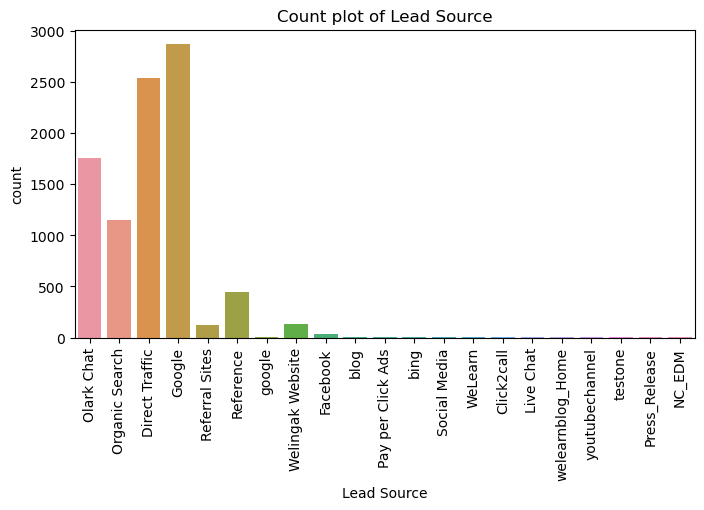

******************************************************************************************************
Value count of Country
________________________________________________
India                   6492
NaN                     2324
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana        

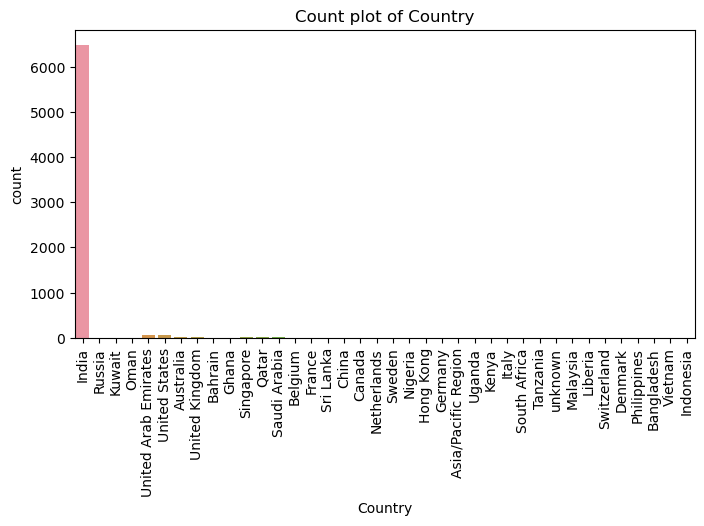

******************************************************************************************************
Value count of Specialization
________________________________________________
NaN                                  3304
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization

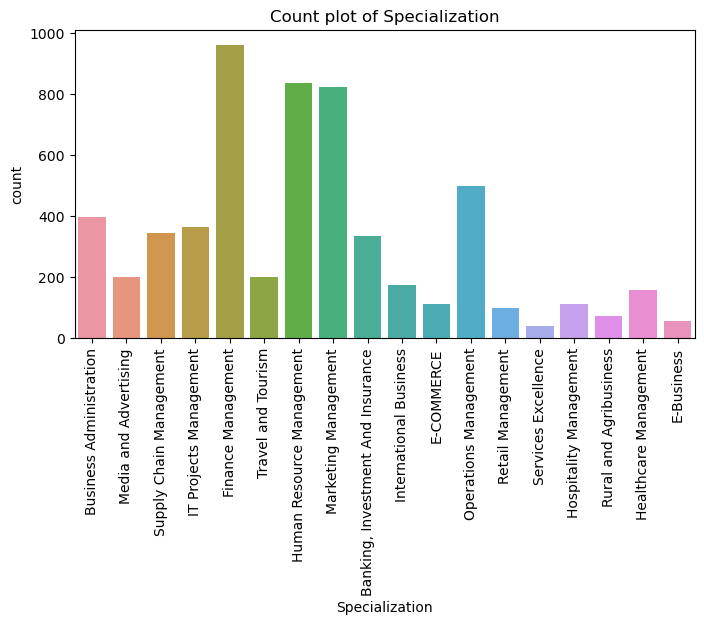

******************************************************************************************************
Value count of What is your current occupation
________________________________________________
Unemployed              5502
NaN                     2683
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


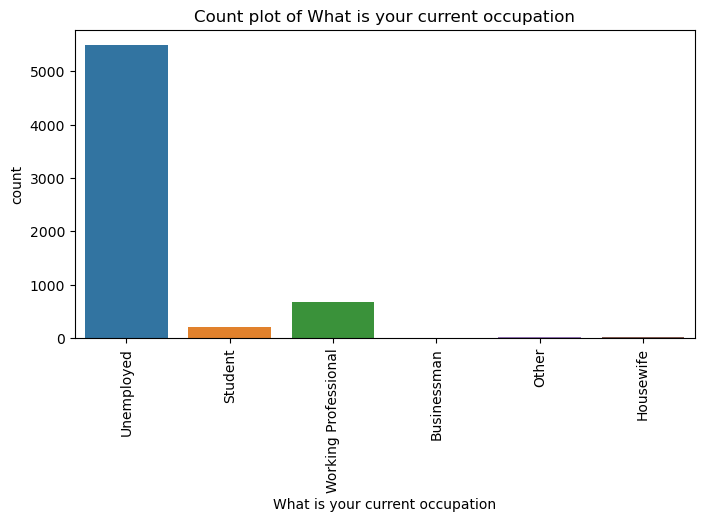

******************************************************************************************************
Value count of What matters most to you in choosing a course
________________________________________________
Better Career Prospects      6399
NaN                          2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


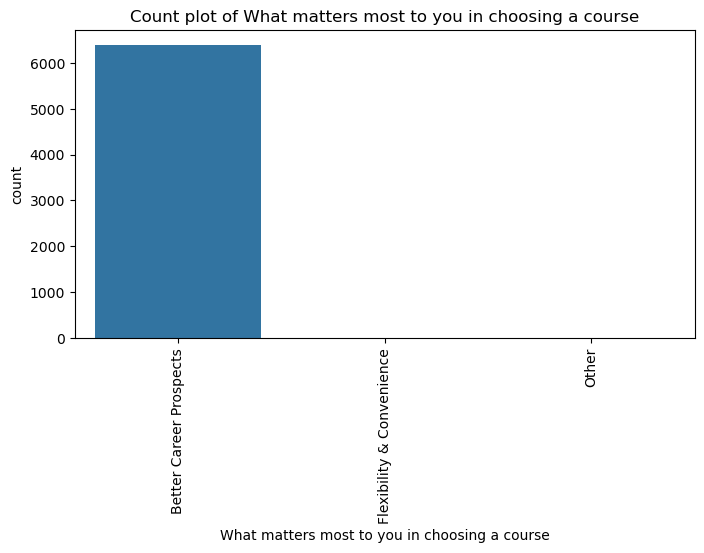

******************************************************************************************************
Value count of Tags
________________________________________________
NaN                                                  3333
Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number giv

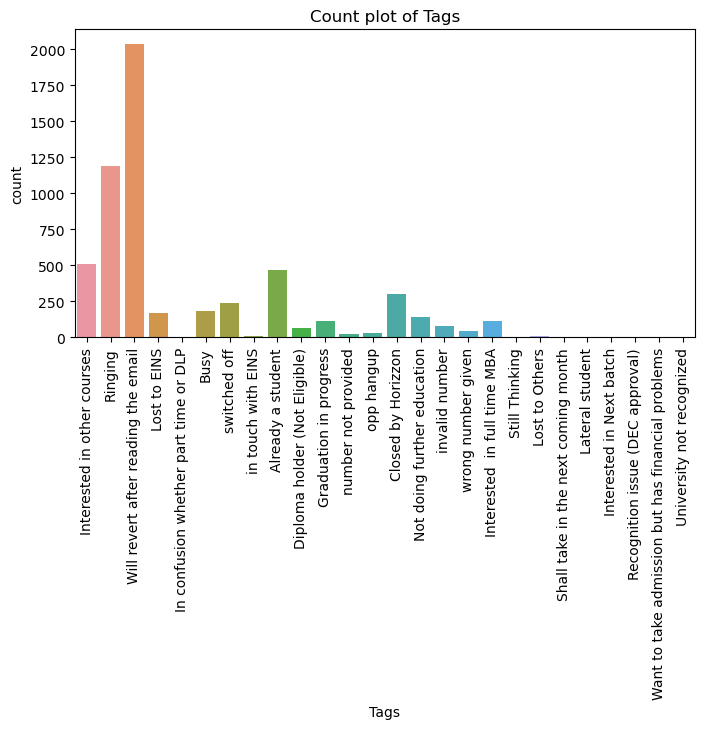

******************************************************************************************************
Value count of Lead Quality
________________________________________________
NaN                  4729
Might be             1533
Not Sure             1087
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: Lead Quality, dtype: int64


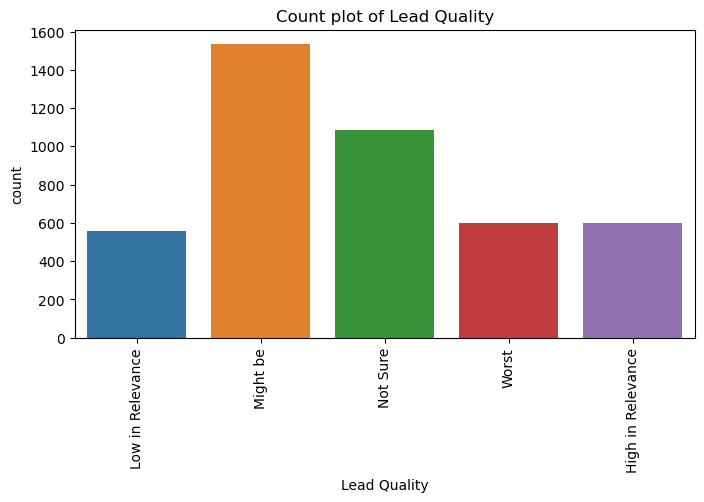

******************************************************************************************************
Value count of City
________________________________________________
NaN                            3600
Mumbai                         3179
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64


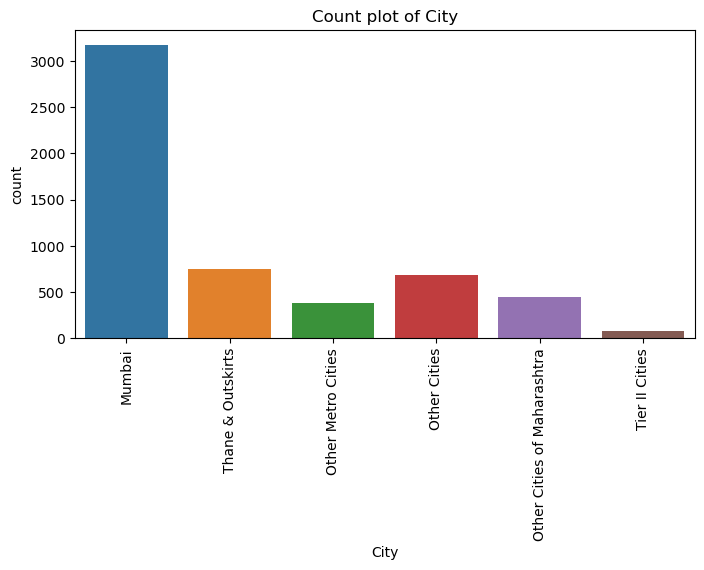

******************************************************************************************************


In [26]:
for col in missing_cat_col:
    plot_value_counts(col)
    print("******************************************************************************************************")

#### Inferences :- 
- **Lead Source** : Imputing NaN values with Google as Lead Source as "Google" has highest number of occurences.
- **Country** : Missing values in Country column are quite high, so we will impute NaN values with Mode value of the column i.e. "India" itself.
- **Speciaization** : It is possible that users looking for courses in X education are Students/Freshers which may not have any specialization with them. So imputing NaN values with "Not Provided" value.
- **What is your current occupation** : Replacing NaN values with mode value of column i.e. Unemployed. It is highly likely that the most number of people exploring courses are students or people with no jobs. 
- **What matters most to you in choosing a course** : Imputing NaN values with mode value of this columns i.e. "Better Career Prospects". However after replacing NaN values with the mode value, it seems this column *"What matters most to you in choosing a course"* has highly imbalanced data i.e. all the data is limited to only one category so we will proceed by dropping this column.
- **Tags** : Imputing NaN values with mode value of the column i.e. *"Will revert after reading the email"*.
- **Lead Quality** : For this column we will replace NaN value with *"Not Sure"* value of the column instead of the mode value of the column. Firstly there is not much difference between the 2 categories and secondly since most of the leads are not converted into users it seems justified.
- **City** : Replacing NaN values with Mumbai. Also reducing categories by combining Thane & Otskirts value and Other Cities of Maharashtra into Mumbai. Also replacing Tier II cities with Other cities value.

#### Imputing missing (NaN and Select) values with best suited category if that column

In [27]:
# Lead Source
leads_df["Lead Source"].fillna("Google", inplace=True)

# Specialization
leads_df.Specialization.fillna("Not Provided", inplace = True)

#What is your current occupation
leads_df["What is your current occupation"].fillna("Unemployed", inplace=True)

# Tags
leads_df.Tags.fillna("Will revert after reading the email", inplace=True)

# Lead Quality
leads_df["Lead Quality"].fillna("Not Sure", inplace=True)

#City
# Replacing null values in this column with 'Mumbai'. Also, replacing ('Thane & Outskirts', 'Other Cities of Maharashtra') with 'Mumbai' and replacing 'Tier II Cities' with 'Other Cities' 
leads_df.City.fillna("Mumbai", inplace = True)
leads_df['City'] = leads_df['City'].replace("Thane & Outskirts", "Mumbai")
leads_df['City'] = leads_df['City'].replace("Other Cities of Maharashtra", "Mumbai")
leads_df['City'] = leads_df['City'].replace("Tier II Cities", "Other Cities")

In [28]:
# Country
leads_df["Country"].fillna("India", inplace=True)

leads_df["Country"].value_counts(normalize=True)

India                   0.968472
United States           0.007580
United Arab Emirates    0.005822
Singapore               0.002636
Saudi Arabia            0.002307
United Kingdom          0.001648
Australia               0.001428
Qatar                   0.001099
Hong Kong               0.000769
Bahrain                 0.000769
Oman                    0.000659
France                  0.000659
unknown                 0.000549
South Africa            0.000439
Nigeria                 0.000439
Germany                 0.000439
Kuwait                  0.000439
Canada                  0.000439
Sweden                  0.000330
China                   0.000220
Asia/Pacific Region     0.000220
Uganda                  0.000220
Bangladesh              0.000220
Italy                   0.000220
Belgium                 0.000220
Netherlands             0.000220
Ghana                   0.000220
Philippines             0.000220
Russia                  0.000110
Switzerland             0.000110
Vietnam   

- As we can see after imputing null values with "India", almost 97% of data is from only one category i.e. "India". This makes this column highly imbalanced and imperfect for data modelling. So we will drop this column from further analysis.

In [29]:
leads_df.drop("Country", axis=1, inplace=True)

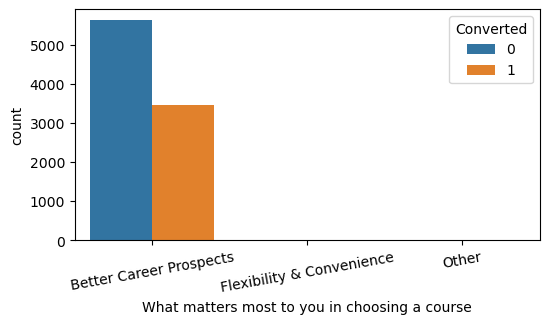

In [30]:
# What matters most to you in choosing a course
leads_df["What matters most to you in choosing a course"].fillna("Better Career Prospects", inplace=True)
plt.figure(figsize=(6,3))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted",  data = leads_df)
plt.xticks(rotation = 10)
plt.show()

In [31]:
leads_df.drop("What matters most to you in choosing a course", axis= 1, inplace = True)

In [32]:
leads_df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

- There are no null values remaining in any columns.


## Step 3 - Exploratory Data Analysis

### - Categorical Attributes Analysis

In [33]:
categorical_col = list(leads_df.iloc[:,1:].select_dtypes(include='object'))
categorical_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Lead Origin
_________________________________________________________________________________________________
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64


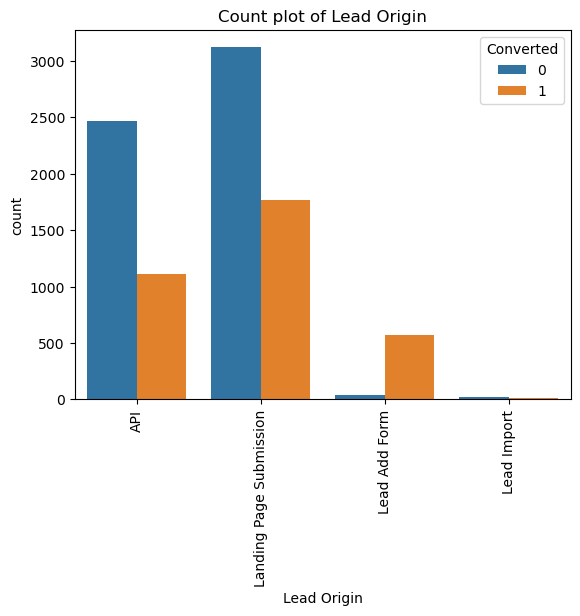

*************************************************************************************************
Lead Source
_________________________________________________________________________________________________
Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


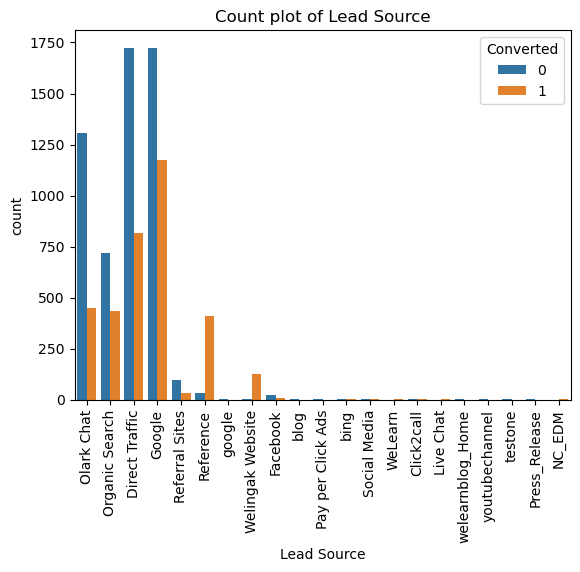

*************************************************************************************************
Do Not Email
_________________________________________________________________________________________________
No     8379
Yes     724
Name: Do Not Email, dtype: int64


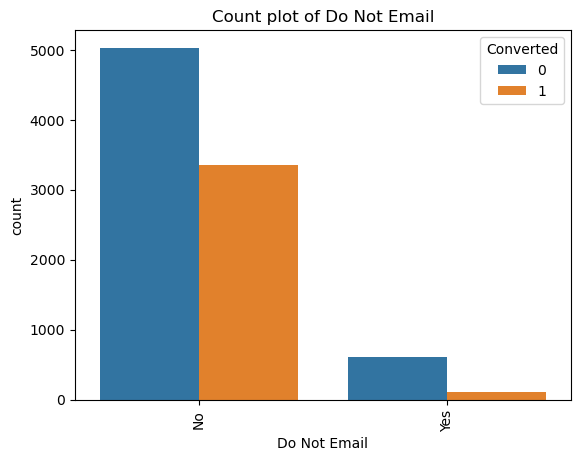

*************************************************************************************************
Do Not Call
_________________________________________________________________________________________________
No     9101
Yes       2
Name: Do Not Call, dtype: int64


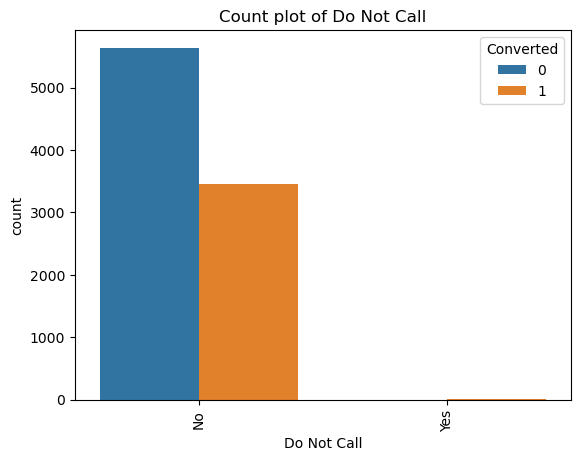

*************************************************************************************************
Last Activity
_________________________________________________________________________________________________
Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


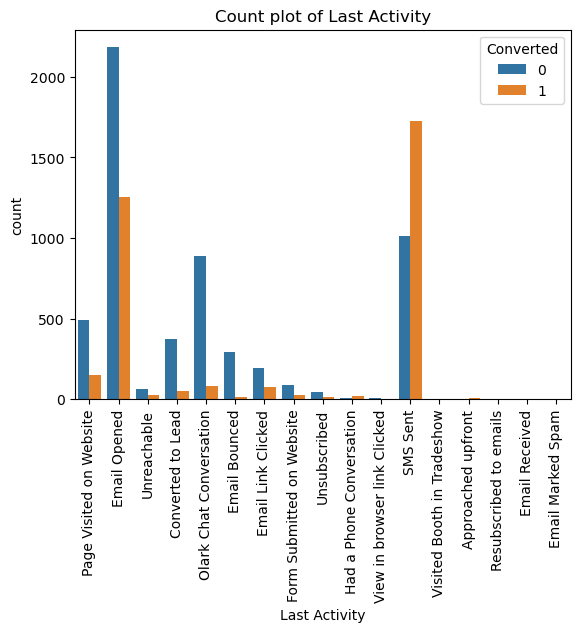

*************************************************************************************************
Specialization
_________________________________________________________________________________________________
Not Provided                         3304
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence              

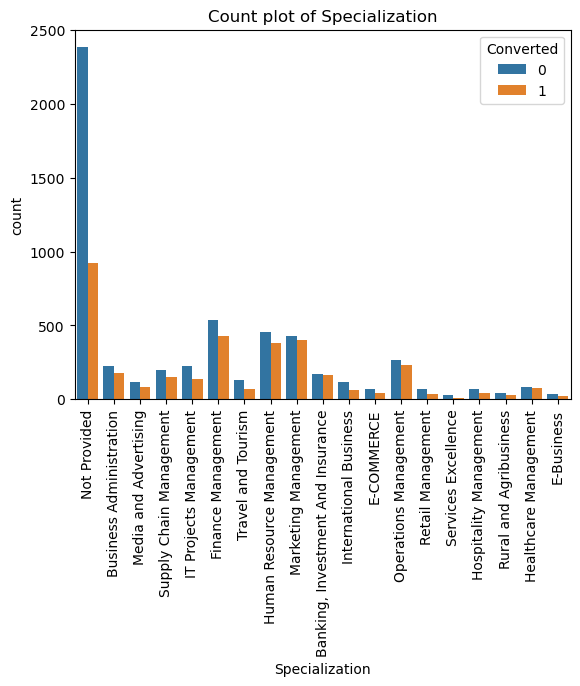

*************************************************************************************************
What is your current occupation
_________________________________________________________________________________________________
Unemployed              8185
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


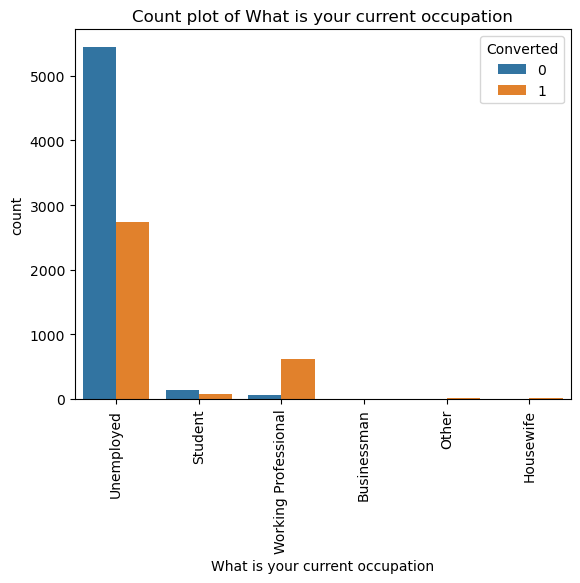

*************************************************************************************************
Search
_________________________________________________________________________________________________
No     9089
Yes      14
Name: Search, dtype: int64


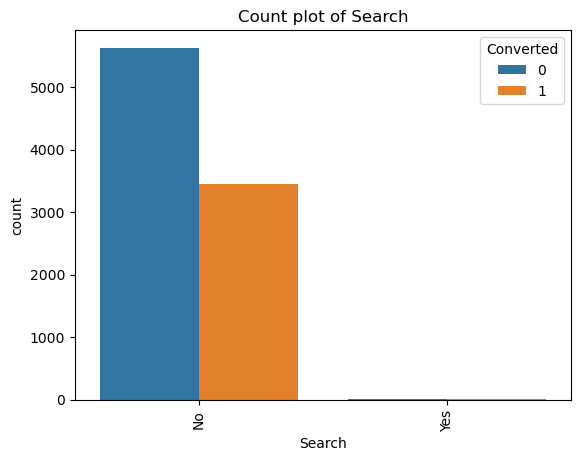

*************************************************************************************************
Magazine
_________________________________________________________________________________________________
No    9103
Name: Magazine, dtype: int64


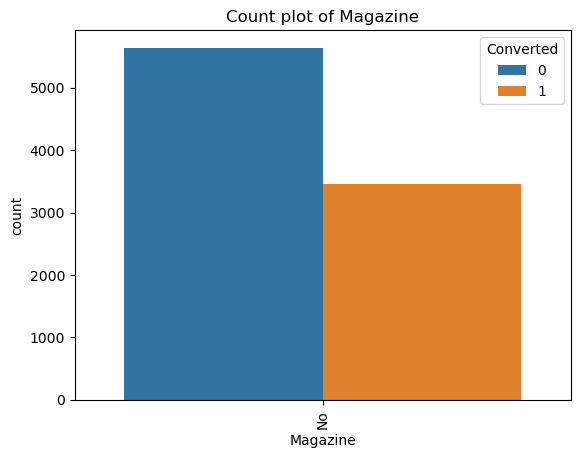

*************************************************************************************************
Newspaper Article
_________________________________________________________________________________________________
No     9101
Yes       2
Name: Newspaper Article, dtype: int64


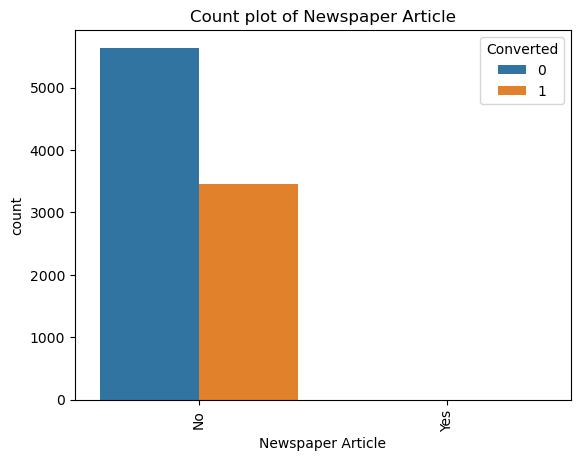

*************************************************************************************************
X Education Forums
_________________________________________________________________________________________________
No     9102
Yes       1
Name: X Education Forums, dtype: int64


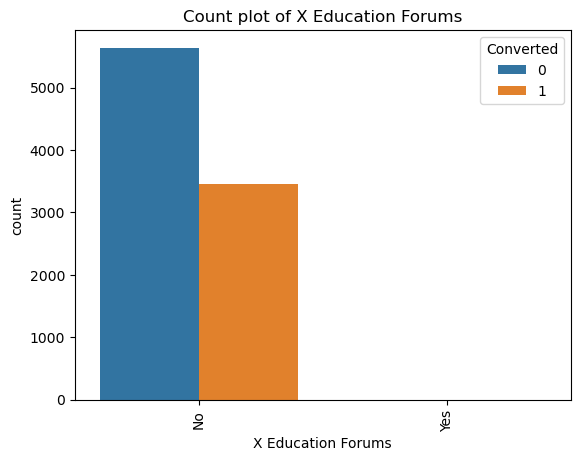

*************************************************************************************************
Newspaper
_________________________________________________________________________________________________
No     9102
Yes       1
Name: Newspaper, dtype: int64


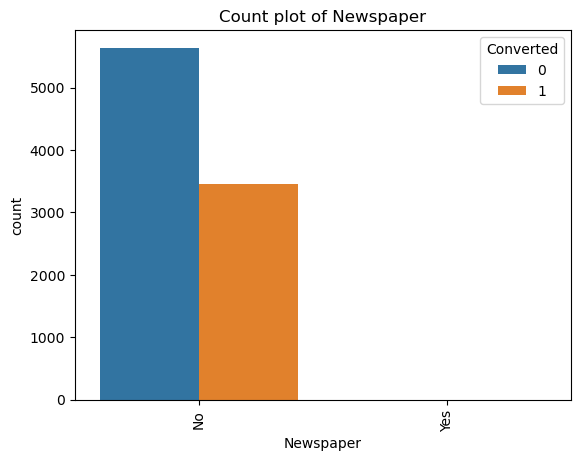

*************************************************************************************************
Digital Advertisement
_________________________________________________________________________________________________
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64


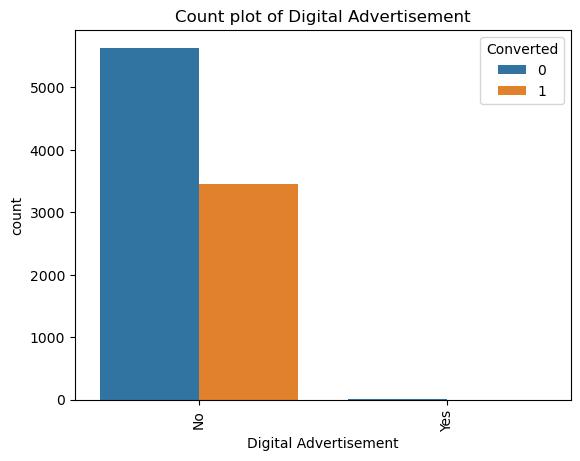

*************************************************************************************************
Through Recommendations
_________________________________________________________________________________________________
No     9096
Yes       7
Name: Through Recommendations, dtype: int64


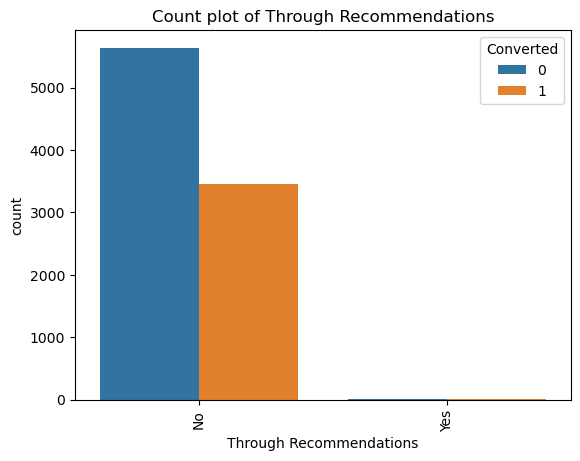

*************************************************************************************************
Receive More Updates About Our Courses
_________________________________________________________________________________________________
No    9103
Name: Receive More Updates About Our Courses, dtype: int64


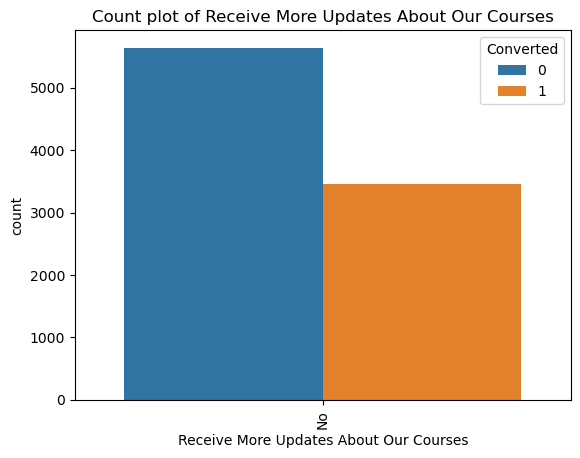

*************************************************************************************************
Tags
_________________________________________________________________________________________________
Will revert after reading the email                  5368
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                           

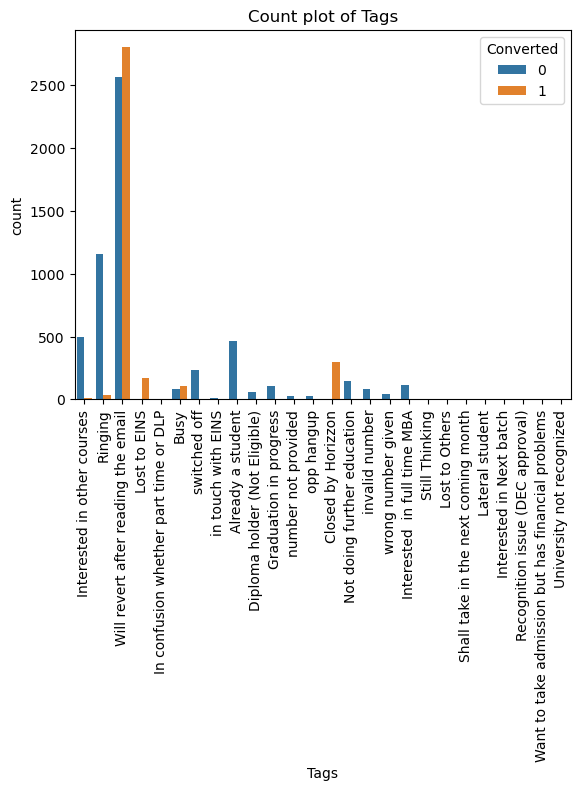

*************************************************************************************************
Lead Quality
_________________________________________________________________________________________________
Not Sure             5816
Might be             1533
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: Lead Quality, dtype: int64


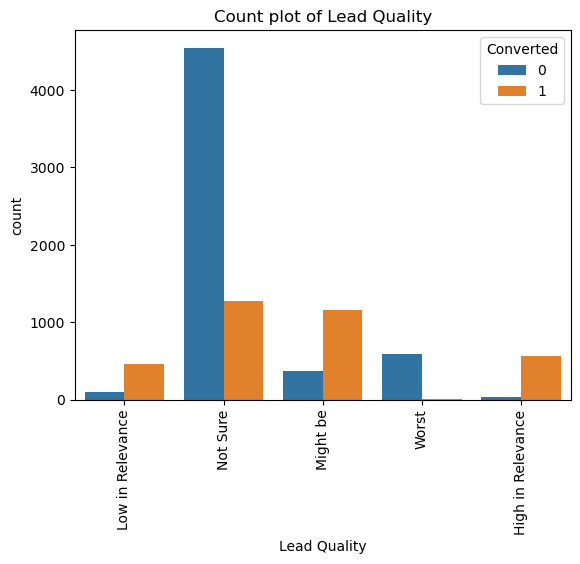

*************************************************************************************************
Update me on Supply Chain Content
_________________________________________________________________________________________________
No    9103
Name: Update me on Supply Chain Content, dtype: int64


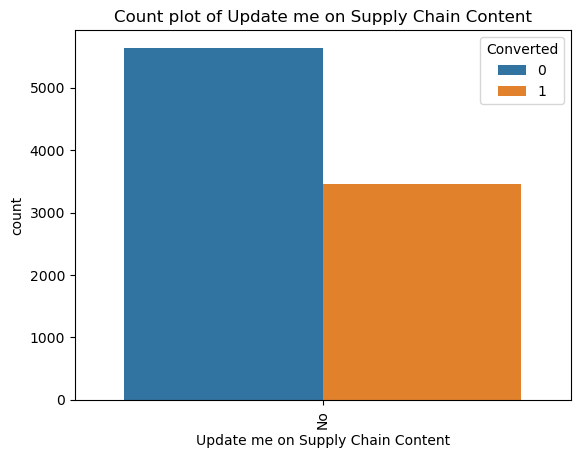

*************************************************************************************************
Get updates on DM Content
_________________________________________________________________________________________________
No    9103
Name: Get updates on DM Content, dtype: int64


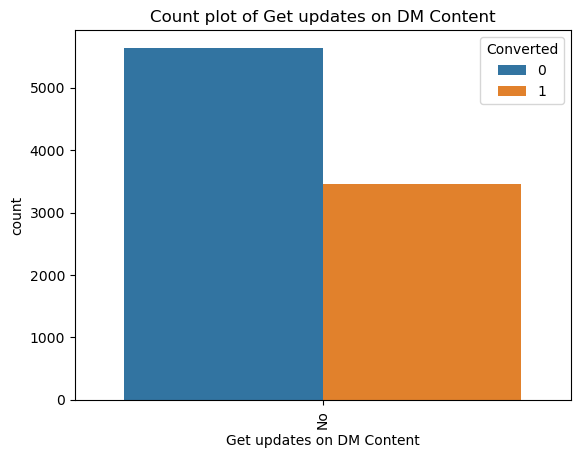

*************************************************************************************************
City
_________________________________________________________________________________________________
Mumbai                7972
Other Cities           754
Other Metro Cities     377
Name: City, dtype: int64


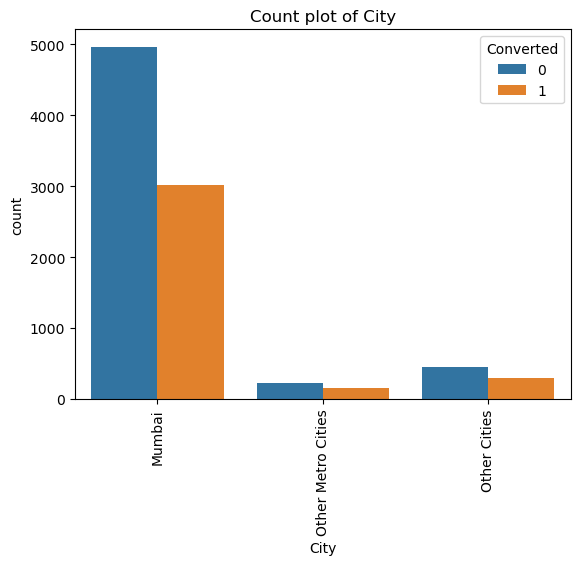

*************************************************************************************************
I agree to pay the amount through cheque
_________________________________________________________________________________________________
No    9103
Name: I agree to pay the amount through cheque, dtype: int64


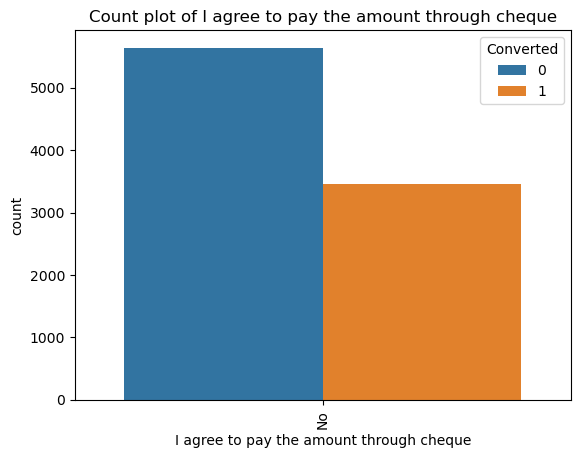

*************************************************************************************************
A free copy of Mastering The Interview
_________________________________________________________________________________________________
No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


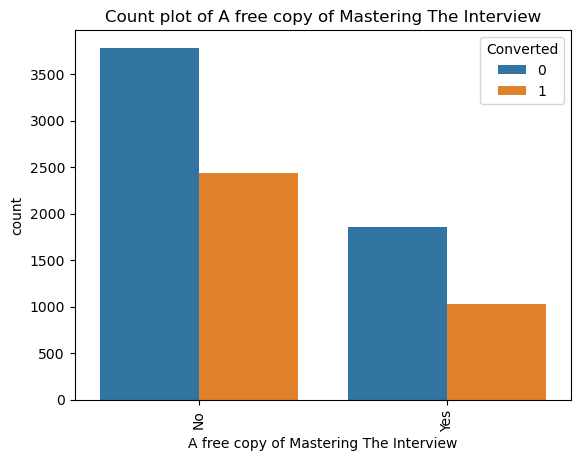

*************************************************************************************************
Last Notable Activity
_________________________________________________________________________________________________
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


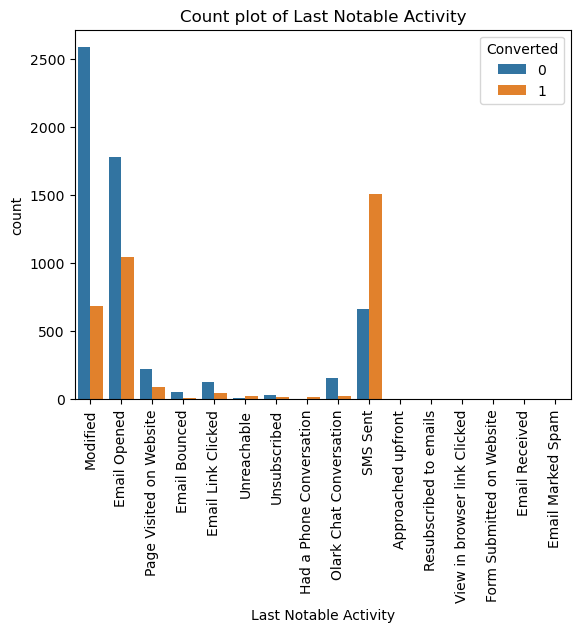

*************************************************************************************************


In [34]:
for col in categorical_col:
    print(col)
    print("_________________________________________________________________________________________________")
    print(leads_df[col].value_counts())
    sns.countplot(x=col, hue="Converted", data=leads_df)
    plt.title("Count plot of " + col)
    plt.xticks(rotation = 90)
    plt.show()
    print("*************************************************************************************************")

##### Conclusions:
Follwing points can be inferred from above value counts and count plot of all the categorical variables of leads data set:
- **Lead Origin**: The most number of leads are brought from 'API' and 'Landing Page submission', also their conversion rate are quite good. For 'Lead Add Form' number of incoming leads are less but their conversion rate is quite higher. To improve the lead conversion rate, we have to focus more on leads coming from 'API' and 'Landing Page Submission'.
        
- **Lead Source**: Maximum number of leads are obtained by 'Google' and 'Direct Traffic' with more conversion rate for 'Google'. It can also be observed conversion rate of "Reference' and 'Welingak' website is higher. To improve the conversion we should focus more on leads from Olark Chat, Organic Search, Direct Traffic, Google, Referral site.


- **Do Not Email**: Most of incoming leads chose this option as 'No' while negligible users has chosen 'Yes'. (We will add this column in **"drop_col"** list)


- **Do Not Call**: Since almost all the leads has chosen this option as 'No' being 99% of the data, we will drop this column from further analysis. (We will add this column in **"drop_col"** list).

- **Last Activity**: This column has many categories with most number of leads obtained in from "EMail Opened" and "SMS Sent" categories. Conversion rate for "SMS Sent" is higher than any of the categories. It can noted that there are many categories with very low frequncy values, so we will combine these values into one new category i.e. "Other_Last_Activity".

- **Specialization**: Most of the incoming leads have not provided their details for Specialization. It can be concluded from this that most of the leads are either Students or Unemployed people who are not associated with any specialization.

- **What is current occupation**: Most of the leads are obtained from "Unemployed" section, however conversion rate for "Working Preofessional" is quite higher. So to improve conversion rate X Education should focus more "Working Professional"

- **Tags**: This column signify the current status of leads and most of the leads have status as *'Will revert after reading the email'*, also conversion rate of this status is highest than other categories. For this column too we will combine low frequency categories into one category i.e. "Other_Tags".

- **Lead Quality**: This column indicates the quality of lead based on data and interaction of lead with X education employee. As we can observe conversion ratio of "Might Be" category is quite good so to improve conversion rate X education should focus more this category and provide attractive offers.


- **City**: It can observed that most of the leads are received from Mumbai city only while for other categories frequncis very low. Since the data is quite imbalance and also sinceit is an online course it does not matter the City of lead so we will drop this column (this will added in **"drop_col"** list).

- **Last Notable Activity**: This column indicates the last notable activity performed by student. Conversion rate for "SMS Sent" is higher than other categories. We will combine low frequency categories for this column too into one new category i.e. "Other_Notable_Activity".

- **Search, Magazine, Newspaper Artice, Search, X Education Forum, Newspaper, Digital Advertisement, Through Recomendation, Receive more updates about our course, Update me on supply chain content, Get updates on DM Content, I agree to pay the amount through cheque**: All of these features are having highly imbalanced data i.e. value is limited to only one category, so will consider dropping these varaibles from further analysis (these columns will be appended in **"drop_col"** list).

##### Lead Source

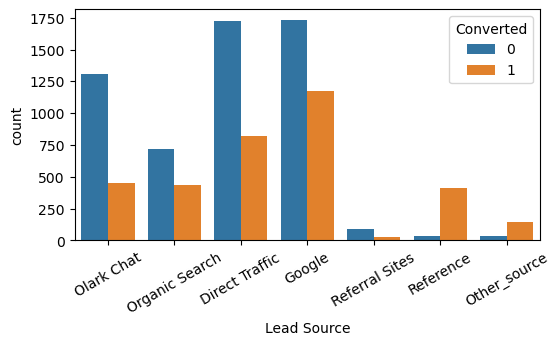

In [35]:
# There are two values for Google (google & Google), combining them into one
leads_df["Lead Source"].replace("google", "Google", inplace=True)

# Also we can observe that count of leads from some the sources are negligible so we can 
# combine then and replace them with a new category as "Other_Source"
leads_df["Lead Source"] = leads_df["Lead Source"].replace(["bing","Click2call","Social Media","Live Chat",
                          "Press_Release","Pay per Click Ads","blog","WeLearn","welearnblog_Home","youtubechannel",
                          "testone","NC_EDM","Welingak Website","Facebook"], "Other_source")

plt.figure(figsize=(6,3))
sns.countplot(x = "Lead Source", hue = "Converted",  data = leads_df)
plt.xticks(rotation = 30)
plt.show()

##### Last Activity

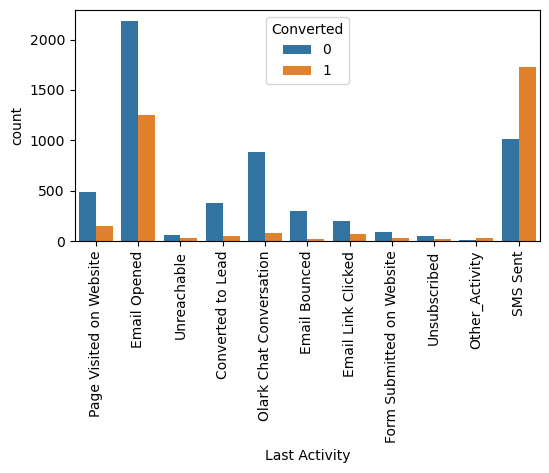

In [36]:
leads_df["Last Activity"] = leads_df["Last Activity"].replace(["Had a Phone Conversation","View in browser link Clicked",
                                                              "Approached upfront","Email Received","Email Marked Spam","Visited Booth in Tradeshow",
                                                              "Resubscribed to emails"],"Other_Activity")

plt.figure(figsize=(6,3))
sns.countplot(x = "Last Activity", hue = "Converted",  data = leads_df)
plt.xticks(rotation = 90)
plt.show()

##### Tags

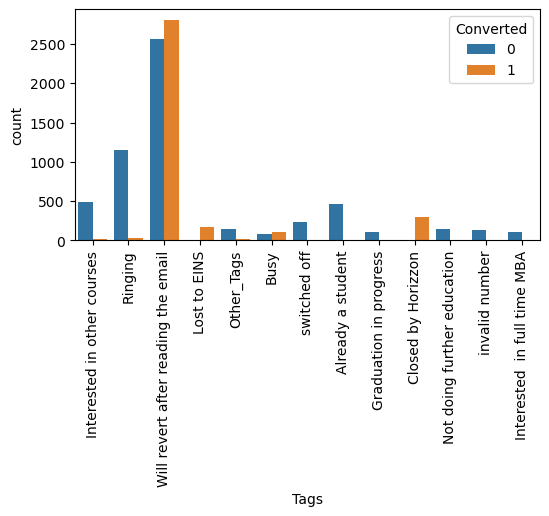

In [37]:
leads_df.Tags.replace("wrong number given","invalid number", inplace=True)
leads_df.Tags = leads_df.Tags.replace(["Diploma holder (Not Eligible)","opp hangup","number not provided","in touch with EINS","Lost to Others","Still Thinking",
                       "In confusion whether part time or DLP","Interested in Next batch","Want to take admission but has financial problems",
                      "Lateral student","Shall take in the next coming month","University not recognized","Recognition issue (DEC approval)"], "Other_Tags")

plt.figure(figsize=(6,3))
sns.countplot(x = "Tags", hue = "Converted",  data = leads_df)
plt.xticks(rotation = 90)
plt.show()

#### Last Notable Activity

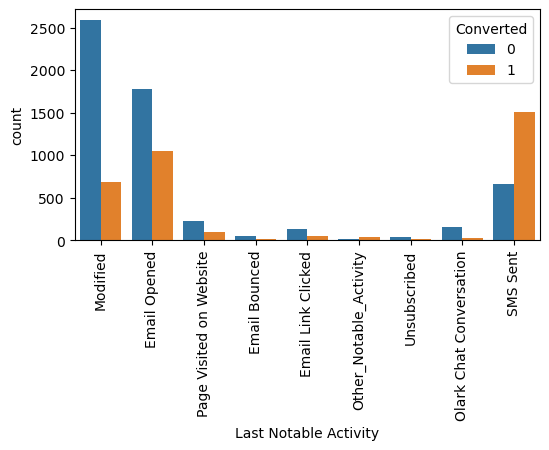

In [38]:
leads_df["Last Notable Activity"] = leads_df["Last Notable Activity"].replace(["Unreachable","Had a Phone Conversation",
                                    "Email Marked Spam","Approached upfront","Resubscribed to emails","View in browser link Clicked",
                                                                              "Form Submitted on Website","Email Received"],"Other_Notable_Activity")
plt.figure(figsize=(6,3))
sns.countplot(x = "Last Notable Activity", hue = "Converted",  data = leads_df)
plt.xticks(rotation = 90)
plt.show()

### - Numerical Attributes Analysis

In [39]:
numerical_cols = list(leads_df.select_dtypes(include = ['int64','float64']))
numerical_cols

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [40]:
leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
count    9103.000000  9103.000000  9103.000000                  9103.000000           9103.000000
mean   617027.742612     0.380204     3.445238                   481.350104              2.362820
std     23337.138926     0.485464     4.854853                   545.066142              2.161418
min    579533.000000     0.000000     0.000000                     0.000000              0.000000
25%    596408.000000     0.000000     1.000000                     9.000000              1.000000
50%    615278.000000     0.000000     3.000000                   244.000000              2.000000
75%    637166.000000     1.000000     5.000000                   919.500000              3.000000
max    660737.000000     1.000000   251.000000                  2272.000000             55.000000

In [41]:
def plot_num(num_col):
    plt.figure(figsize=[4,3])
    sns.set(style="darkgrid")
    sns.distplot(leads_df[num_col], color='g')
    plt.yscale('linear')
    plt.xticks(rotation = 90)
    plt.show()

Plot of - Lead Number


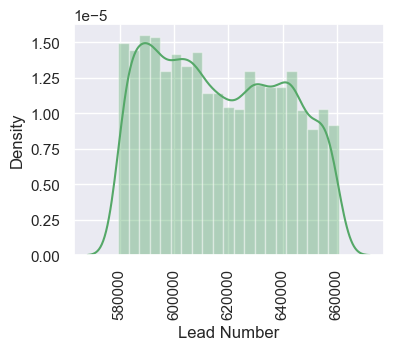

*******************************************************************************************************************
Plot of - Converted


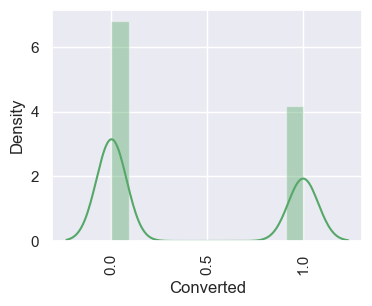

*******************************************************************************************************************
Plot of - TotalVisits


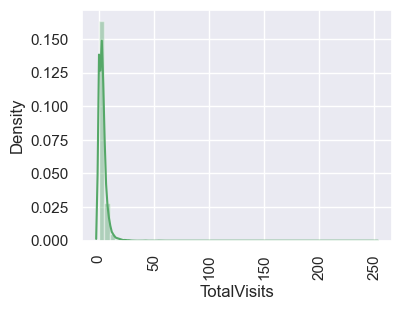

*******************************************************************************************************************
Plot of - Total Time Spent on Website


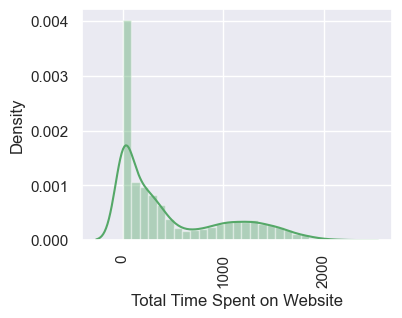

*******************************************************************************************************************
Plot of - Page Views Per Visit


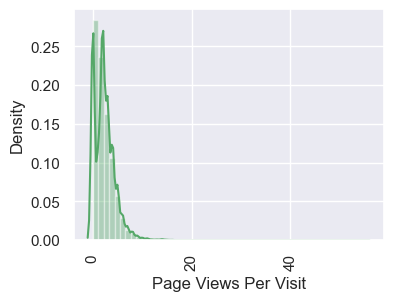

*******************************************************************************************************************


In [42]:
for col in numerical_cols:
    print("\033[1m" + "Plot of - " + "\033[1m" + col )
    plot_num(col)
    print('*******************************************************************************************************************')

##### Inferences:
- **Lead Number** - This is an unique sequential number assigned to each incoming leads and it does not provide much information with respect to model preparation. We can consider dropping this column.
- **Converted** - This is target varaible for this project and as it can be observed from graph it has only 2 values i.e. 0 and 1.
- **TotalVisits** - This variable indicates number of visits by a Lead, most of its value are ranging between 0 and 10 with few outlier values.
- **Total Time Spent on Website** - It indicates total time spent by a Lead on X education website. The dist plot for this variable is spread 0 till 2000 with peak being at 0.
- **Page Views Per Visit** - This gives an average page views by a Lead during the visits. This value is mostly ranging from 0 to 8 with two peaks at 0 and 2.

##### Converted - fetching current conversion rate

In [43]:
leads_df["Converted"].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

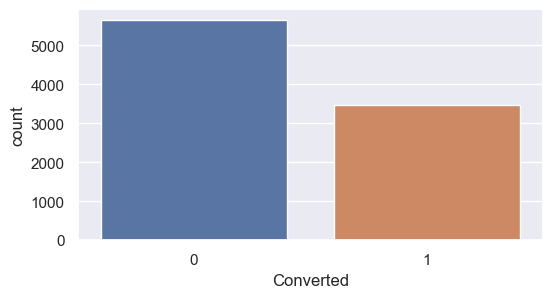

In [44]:
plt.figure(figsize=(6,3))
sns.countplot(x = "Converted",data = leads_df)
plt.show()

- **Current conversion rate of leads is 38%**

### - Outlier Analysis

- As we can observe "Converted" column is a categorical value with values 0 and 1 so it can be safely removed from outlier analysis.
- Lead Number is an Id assigned to each lead which is a incremental value and does not qualify for outlier analysis s well.

In [45]:
outlier_col_list =  ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

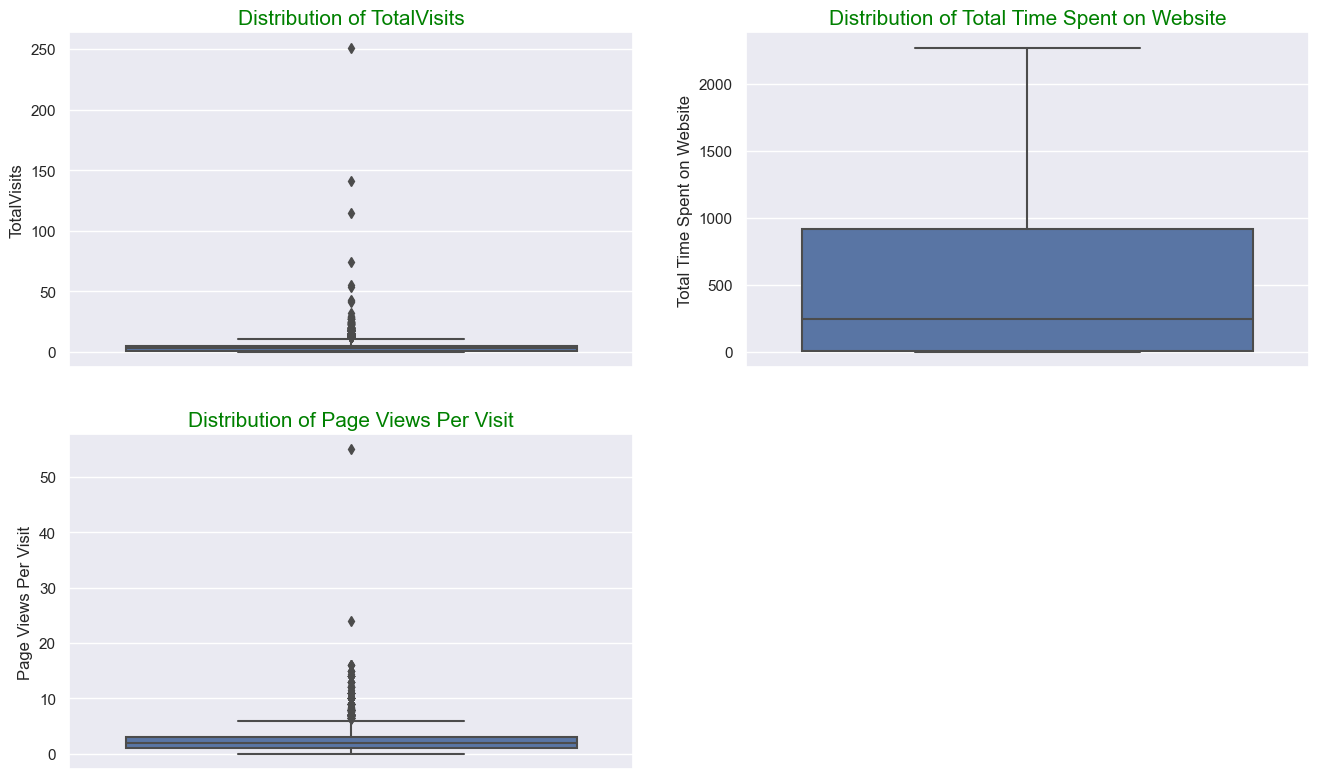

In [46]:
plt.figure(figsize= [16,20])
k = 0
for col in outlier_col_list:
    k = k+1
    plt.subplot(4,2,k)
    sns.boxplot(y = col, data= leads_df)
    plt.title('Distribution of ' + col, fontsize=15, color="green")
    plt.show

- Follwing points can be concluded from the above analysis:
    - **Total Visits** : This column contains few outliers. As we can see the 75% quantile of this feature is upto 5 whereas outlier value ranges from 50 and above. So we will treat the outlier by capping the value to 95%.
    - **Total Time Spent on Website** : This column has no major outliers, so we will not perform outlier treatment on this column.
    - **Page Views Per Visit** : This feature have quite few outliers, so we will capping the outliers to 95% value for analysis.
        

#### Handling Outlier for "Total Visits" 

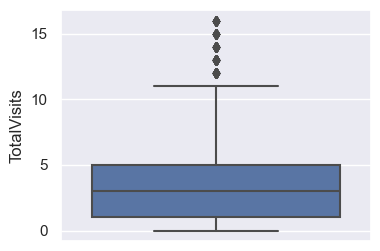

In [47]:
Q3 = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[leads_df.TotalVisits < Q3]
plt.figure(figsize=[4,3])
sns.boxplot(y = "TotalVisits", data= leads_df)
plt.show()

#### Handling Outliers for "Page Views per visit"

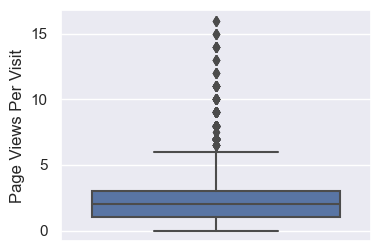

In [48]:
Q3_PgVis = leads_df["Page Views Per Visit"].quantile(0.99)
leads_df = leads_df[leads_df["Page Views Per Visit"] < Q3]
plt.figure(figsize=[4,3])
sns.boxplot(y = "Page Views Per Visit", data= leads_df)
plt.show()

### - Dropping highly imbalanced/redundant columns
- As can be observed from the above EDA below mentioned variables of data set are having only type of data i.e. "No" hence no conclusions can be withdrawn from these columns. So, following columns will be dropped from the data set as these columns are irrelavent to analysis data and are redundant

Prospect ID, Magazine, Newspaper Artice, Search, X Education Forum, Newspaper, Digital Advertisement, Through Recomendation, Receive more updates about our course, Update me on supply chain content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview

In [49]:
drop_cols = ["Prospect ID","Magazine","Newspaper Article","Search","X Education Forums","Newspaper","Digital Advertisement",
            "Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content",
            "I agree to pay the amount through cheque","Do Not Call","Do Not Email","A free copy of Mastering The Interview"]

In [50]:
leads_df.drop(drop_cols, axis=1, inplace=True)

In [51]:
leads_df.shape

(9004, 14)

In [52]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9004 non-null   int64  
 1   Lead Origin                      9004 non-null   object 
 2   Lead Source                      9004 non-null   object 
 3   Converted                        9004 non-null   int64  
 4   TotalVisits                      9004 non-null   float64
 5   Total Time Spent on Website      9004 non-null   int64  
 6   Page Views Per Visit             9004 non-null   float64
 7   Last Activity                    9004 non-null   object 
 8   Specialization                   9004 non-null   object 
 9   What is your current occupation  9004 non-null   object 
 10  Tags                             9004 non-null   object 
 11  Lead Quality                     9004 non-null   object 
 12  City                

## Step 4 - Data Preparation

*-There are certain columns in the data frame which has multiple category values. So to predict the data with respect to each category, dummy variables will be created which helps us in getting individual columns for each category of the original variable. Also after creating individual categorical column we will delete the original columns.*

In [53]:
leads_df.head()

Lead Number              Lead Origin     Lead Source  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit            Last Activity           Specialization What is your current occupation                                 Tags      Lead Quality    City Last Notable Activity
0       660737                      API      Olark Chat          0          0.0                            0                   0.0  Page Visited on Website             Not Provided                      Unemployed          Interested in other courses  Low in Relevance  Mumbai              Modified
1       660728                      API  Organic Search          0          5.0                          674                   2.5             Email Opened             Not Provided                      Unemployed                              Ringing          Not Sure  Mumbai          Email Opened
2       660727  Landing Page Submission  Direct Traffic          1          2.0                         1532                   2.0             Email Opened  Business Administration                         Student  Will revert after reading the email          Might be  Mumbai          Email Opened
3       660719  Landing Page Submission  Direct Traffic          0          1.0                          305                   1.0              Unreachable    Media and Advertising                      Unemployed                              Ringing          Not Sure  Mumbai              Modified
4       660681  Landing Page Submission          Google          1          2.0                         1428                   1.0        Converted to Lead             Not Provided                      Unemployed  Will revert after reading the email          Might be  Mumbai              Modified

In [54]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9004 non-null   int64  
 1   Lead Origin                      9004 non-null   object 
 2   Lead Source                      9004 non-null   object 
 3   Converted                        9004 non-null   int64  
 4   TotalVisits                      9004 non-null   float64
 5   Total Time Spent on Website      9004 non-null   int64  
 6   Page Views Per Visit             9004 non-null   float64
 7   Last Activity                    9004 non-null   object 
 8   Specialization                   9004 non-null   object 
 9   What is your current occupation  9004 non-null   object 
 10  Tags                             9004 non-null   object 
 11  Lead Quality                     9004 non-null   object 
 12  City                

### - Creating Dummy variables for categorical columns
- Will be creating dummy variables for all the categorical columns having number of categories > 2

In [55]:
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other_source  Lead Source_Reference  Lead Source_Referral Sites  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Not Provided  \
0                                    0                          0                        0                   0                       1                           0                         0                      0                           0                            0                                 0                           0                                        0                                      0                             0                                      1                       0                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                            1   
1                                    0                          0                        0                   0                       0                           1                         0                      0                           0                            0                                 0                           1                                        0                                      0                             0                                      0                       0                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                            1   
2                                    1                          0                        0                   0                       0                           0                         0                      0                           0                            0                                 0                           1                                        0                                      0                             0                                      0                       0                          0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                            0   
3                                  

- Dropping the columns from the data set for which dummy variables are created as these are no longer required

In [56]:
leads_df = leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
leads_df.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit
0       660737          0          0.0                            0                   0.0
1       660728          0          5.0                          674                   2.5
2       660727          1          2.0                         1532                   2.0
3       660719          0          1.0                          305                   1.0
4       660681          1          2.0                         1428                   1.0

In [57]:
leads_df = pd.concat([leads_df, dummy], axis = 1)
leads_df.head()

Lead Number  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other_source  Lead Source_Reference  Lead Source_Referral Sites  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  \
0       660737          0          0.0                            0                   0.0                                    0                          0                        0                   0                       1                           0                         0                      0                           0                            0                                 0                           0                                        0                                      0                             0                                      1                       0                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
1       660728          0          5.0                          674                   2.5                                    0                          0                        0                   0                       0                           1                         0                      0                           0                            0                                 0                           1                                        0                                      0                             0                                      0                       0                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
2       660727          1          2.0                         1532                   2.0                                    1                          0                        0                   0                       0                           0                         0                      0                           0                            0                                 0                           1                                        0                                      0                             0                                      0                       0                          0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0   
3       660719          0          1.0                          305                   1.0          

In [58]:
leads_df.shape

(9004, 73)

In [59]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9004 non-null   int64  
 1   Converted                                             9004 non-null   int64  
 2   TotalVisits                                           9004 non-null   float64
 3   Total Time Spent on Website                           9004 non-null   int64  
 4   Page Views Per Visit                                  9004 non-null   float64
 5   Lead Origin_Landing Page Submission                   9004 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9004 non-null   uint8  
 7   Lead Origin_Lead Import                               9004 non-null   uint8  
 8   Lead Source_Google                                    9004

## Step 5 - Splitting Train and Test data sets

- This step is performed to divide the "leads.csv" data frame into two sections (train and test) in 70:30 ratio. We will be creating logistic regression model on the train data set. Once we reach a final solution we will be predicting our test data values using that final model.
- We will also be rescaling the numerical columns of both (train and test) data set using Standard Scaler scaling method.

In [60]:
X = leads_df.drop(["Lead Number", "Converted"], axis=1)
print(X.shape)
X.head()

(9004, 71)


TotalVisits  Total Time Spent on Website  Page Views Per Visit  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other_source  Lead Source_Reference  Lead Source_Referral Sites  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  \
0          0.0                            0                   0.0                                    0                          0                        0                   0                       1                           0                         0                      0                           0                            0                                 0                           0                                        0                                      0                             0                                      1                       0                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0   
1          5.0                          674                   2.5                                    0                          0                        0                   0                       0                           1                         0                      0                           0                            0                                 0                           1                                        0                                      0                             0                                      0                       0                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0   
2          2.0                         1532                   2.0                                    1                          0                        0                   0                       0                           0                         0                      0                           0                            0                                 0                           1                                        0                                      0                             0                                      0                       0                          0                           0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0   
3          1.0                          305    

In [61]:
y = leads_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [62]:
# Splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### - Feature Scaling using StandardScaler

In [63]:
scaler = StandardScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other_source  Lead Source_Reference  Lead Source_Referral Sites  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Last Activity_Unreachable  Last Activity_Unsubscribed  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  \
6597     0.262879                    -0.693617              0.800540                                    1                          0                        0                   1                       0                           0                         0                      0                           0                            0                                 0                           1                                        0                                      0                             0                                      0                       0                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      1                                    0   
4934    -0.073363                    -0.642284              0.316894                                    0                          0                        0                   1                       0                           0                         0                      0                           0                            0                                 0                           0                                        0                                      0                             0                                      0                       1                          0                           0                                       0                          0                          0                                  1                                     0                                      0                                         0                                      0                                      0                                    0   
9042     0.262879                    -0.706450              0.800540                                    1                          0                        0                   0                       0                           0                         0                      0                           0                            0                                 0                           0                                        0                                      0                             0                                      0                       1                          0                           0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    1   
5680     3.625298                    -

In [64]:
Conversion_rate = round(sum(leads_df["Converted"])/len(leads_df["Converted"])*100,2)
Conversion_rate

38.02

- Conversion rate is 38%

### - Looking at Correlations coeffiecients for Train data set

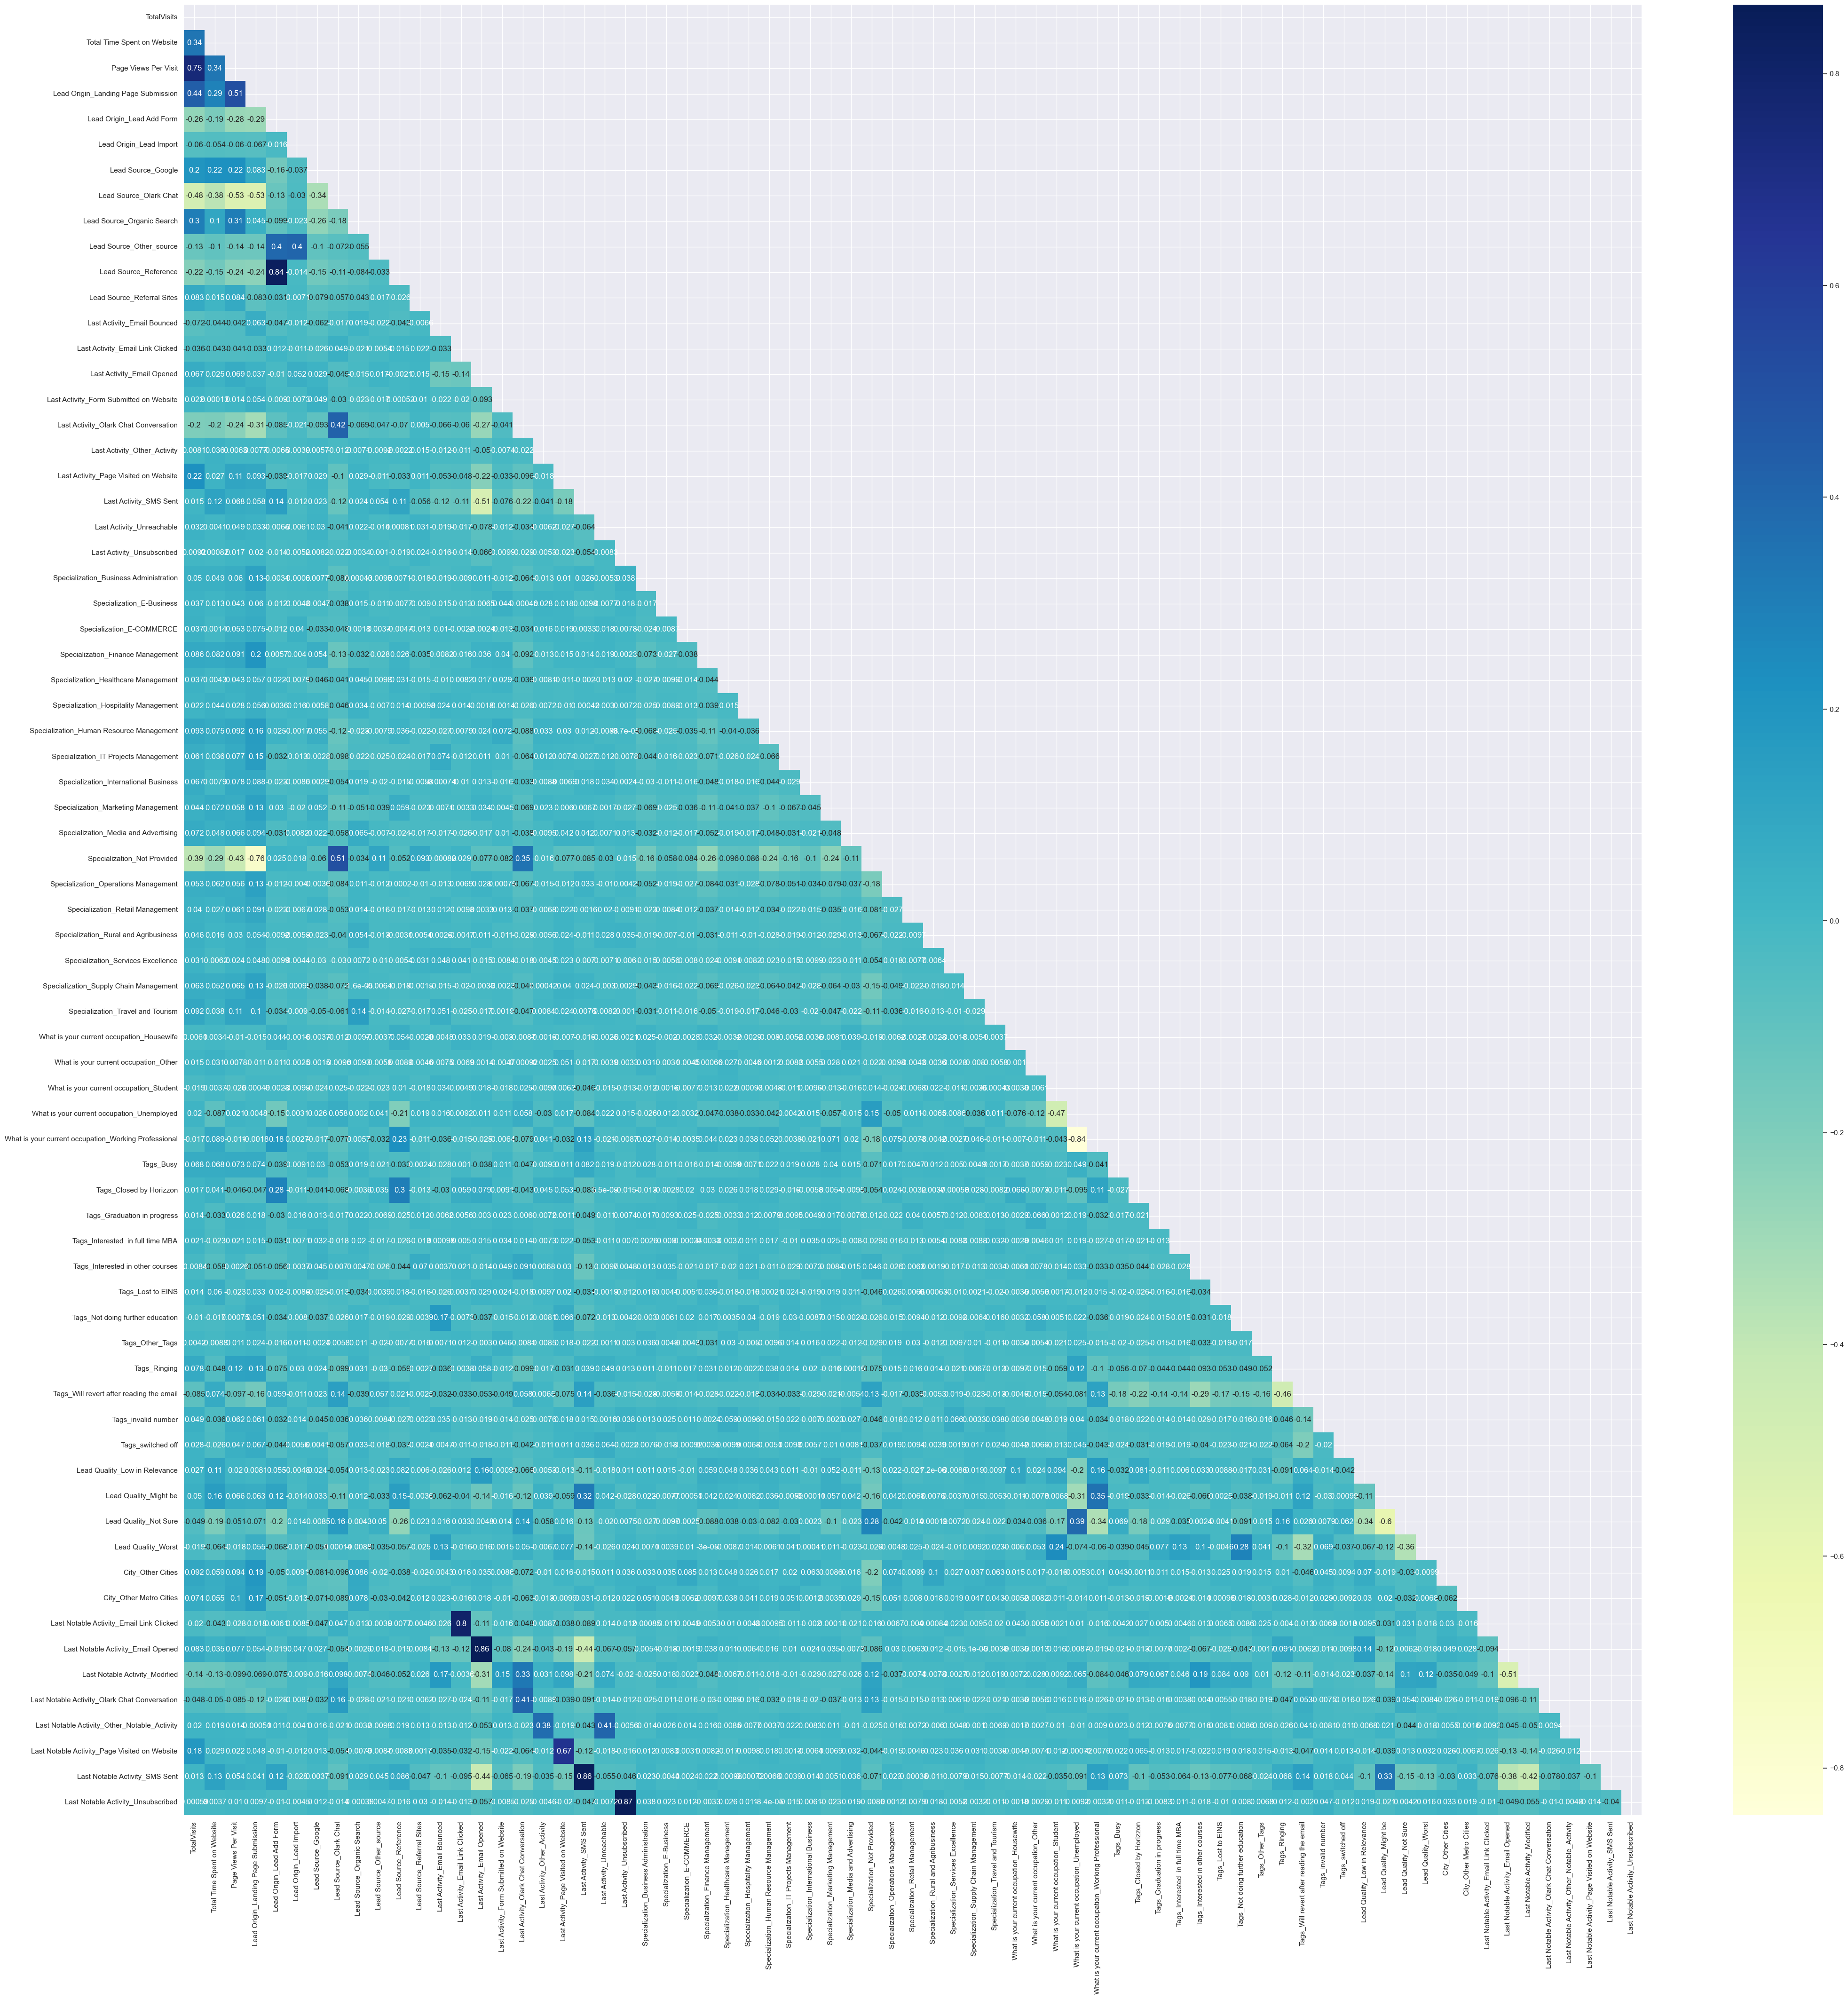

In [65]:
plt.figure(figsize=(50,50))
corr = X_train.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='YlGnBu', mask=mask)
plt.show()

- As evident from the graph there are few variables which are highly correlated, since we can idemtify exact columns from graph above we will calculate the top 20 correlated varaibles and procced accordingly.

##### fetching top 20 correlated variables

In [66]:
correlation_0 = leads_df.corr().abs().unstack().sort_values(kind='quicksort')
correlation_0 = correlation_0.dropna()
correlation_0 = correlation_0[correlation_0 != 1.0]

round(correlation_0.sort_values(ascending=False).head(20),2)

Last Notable Activity_Unsubscribed                    Last Activity_Unsubscribed                              0.88
Last Activity_Unsubscribed                            Last Notable Activity_Unsubscribed                      0.88
Last Notable Activity_Email Opened                    Last Activity_Email Opened                              0.86
Last Activity_Email Opened                            Last Notable Activity_Email Opened                      0.86
Last Notable Activity_SMS Sent                        Last Activity_SMS Sent                                  0.85
Last Activity_SMS Sent                                Last Notable Activity_SMS Sent                          0.85
What is your current occupation_Working Professional  What is your current occupation_Unemployed              0.85
What is your current occupation_Unemployed            What is your current occupation_Working Professional    0.85
Lead Origin_Lead Add Form                             Lead Source_Reference     

### - Dropping highly correlated variables
- We have dropped all the columns with correlation coefficient > 0.80 

In [67]:
X_train = X_train.drop(["Last Notable Activity_Unsubscribed","Last Activity_Unsubscribed","Last Notable Activity_Email Opened",
                       "Last Activity_Email Opened","Last Notable Activity_SMS Sent","Last Activity_SMS Sent","What is your current occupation_Working Professional",
                       "What is your current occupation_Unemployed","Lead Origin_Lead Add Form","Lead Source_Reference","Last Notable Activity_Email Link Clicked",
                       "Last Activity_Email Link Clicked"], axis=1)

In [68]:
X_test = X_test.drop(["Last Notable Activity_Unsubscribed","Last Activity_Unsubscribed","Last Notable Activity_Email Opened",
                       "Last Activity_Email Opened","Last Notable Activity_SMS Sent","Last Activity_SMS Sent","What is your current occupation_Working Professional",
                       "What is your current occupation_Unemployed","Lead Origin_Lead Add Form","Lead Source_Reference","Last Notable Activity_Email Link Clicked",
                       "Last Activity_Email Link Clicked"], axis=1)

## Step 6 - Model Buidling

### Logistic Regresstion Model

- In this sesction we will be building logistic regression model on train data set.
- First we will start with all the variables in the train data set.
- Further, we will be using both automatic (RFE) and manual approach to build final Logistic regression model.

##### 1. First Model (logml) { With all the variables in the train data set excluding target variable (Converted)}

In [69]:
X_train_sm = sm.add_constant(X_train)
logml = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6302
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1505.7
Date:                Tue, 18 Jul 2023   Deviance:                       3011.4
Time:                        15:51:08   Pearson chi2:                 2.16e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5720
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.2814      0.779     -0.361      0.718      -1.809       1.246
TotalVisits                                       0.1830      0.077      2.373      0.018       0.032       0.334
Total Time Spent on Website                       1.0087      0.056     17.912      0.000       0.898       1.119
Page Views Per Visit                             -0.2020      0.080     -2.515      0.012      -0.359      -0.045
Lead Origin_Landing Page Submission              -1.1493      0.189     -6.070      0.000      -1.520      -0.778
Lead Origin_Lead Import                          -3.5632      0.928     -3.840      0.000      -5.382      -1.744
Lead Source_Google                               -0.1045      0.134     -0.779      0.436      -0.367       0.158
Lead Source_Olark Chat                            0.4245      0.183      2.324      0.020       0.067       0.782
Lead Source_Organic Search                       -0.0386      0.186     -0.208      0.835      -0.403       0.326
Lead Source_Other_source                          3.9003      0.498      7.833      0.000       2.924       4.876
Lead Source_Referral Sites                       -0.9149      0.455     -2.013      0.044      -1.806      -0.024
Last Activity_Email Bounced                      -1.7100      0.482     -3.549      0.000      -2.654      -0.766
Last Activity_Form Submitted on Website          -0.4890      0.465     -1.052      0.293      -1.400       0.422
Last Activity_Olark Chat Conversation            -1.2094      0.268     -4.515      0.000      -1.734      -0.684
Last Activity_Other_Activity                      0.3986      1.094      0.364      0.716      -1.745       2.542
Last Activity_Page Visited on Website            -0.4608      0.332     -1.389      0.165      -1.111       0.189
Last Activity_Unreachable                        -1.1171      0.845     -1.322      0.186      -2.773       0.539
Specialization_Business Administration            0.2574      0.358      0.719      0.472      -0.444       0.959
Specialization_E-Business                         0.3083      0.636      0.485      0.628      -0.939       1.555
Specialization_E-COMMERCE                         0.8037      0.481      1.669      0.095      -0.140       1.747
Specialization_Finance Management                -0.0266      0.315     -0.085      0.933      -0.643       0.590
Specialization_Healthcare Management              0.2248      0.508      0.442      0.658      -0.772       1.221
Specialization_Hospitality Management            -0.1687      0.493     -0.342      0.732      -1.135       0.798
Specialization_Human Resource Management          0.0845      0.325      0.260      0.795      -0.552       0.721
Speci

### - Feature Selection using RFE (recusive feauture elimination)

*We have build our first model (logml) with all 59 variables of data set. From the model summary it can be onserved that many variables are having high VIF value and high p-value. To remove each variable one by one will result in huge number of models. So we will be using RFE approach with selected variables.*

In [70]:
Logreg = LogisticRegression()

In [71]:
rfe = RFE(Logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe.support_

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True, False,  True])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Other_source', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', False, 14),
 ('Last Activity_Page Visited on Website', False, 7),
 ('Last Activity_Unreachable', False, 5),
 ('Specialization_Business Administration', False, 25),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 4),
 ('Specialization_Finance Management', False, 31),
 ('Specialization_Healthcare Management', False, 26),
 ('Specialization_Hospitality Management', False, 15),
 ('

In [74]:
col = X_train.columns[rfe.support_]

In [75]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Last Activity_Form Submitted on Website', 'Last Activity_Other_Activity', 'Last Activity_Page Visited on Website', 'Last Activity_Unreachable', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business', 'Specialization_Marketing Management', 'Specialization_Media and Advertising', 'Specialization_Not Provided', 'Specialization_Operations Management', 'Specialization_Retail Management', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism',
       'What

##### 2. Second Model (Logm2) {using RFE}

In [76]:
X_train_sm = sm.add_constant(X_train[col])
Logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = Logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6302
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1729.4
Date:                Tue, 18 Jul 2023   Deviance:                       3458.7
Time:                        15:51:11   Pearson chi2:                 2.68e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5405
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3207      0.271     -1.185      0.236      -0.851       0.210
Lead Origin_Landing Page Submission              -0.4109      0.090     -4.549      0.000      -0.588      -0.234
Lead Origin_Lead Import                          -3.5277      0.894     -3.945      0.000      -5.280      -1.775
Lead Source_Other_source                          3.1053      0.456      6.812      0.000       2.212       3.999
Lead Source_Referral Sites                       -0.8656      0.383     -2.262      0.024      -1.616      -0.116
Last Activity_Email Bounced                      -1.8224      0.438     -4.156      0.000      -2.682      -0.963
Last Activity_Olark Chat Conversation            -1.3465      0.243     -5.549      0.000      -1.822      -0.871
Tags_Busy                                         4.5389      0.340     13.333      0.000       3.872       5.206
Tags_Closed by Horizzon                          28.7847   1.27e+04      0.002      0.998   -2.48e+04    2.48e+04
Tags_Interested  in full time MBA                -0.6531      0.822     -0.795      0.427      -2.264       0.958
Tags_Interested in other courses                 -1.0176      0.507     -2.007      0.045      -2.011      -0.024
Tags_Lost to EINS                                 8.4872      0.592     14.346      0.000       7.328       9.647
Tags_Ringing                                     -0.7760      0.338     -2.296      0.022      -1.438      -0.113
Tags_Will revert after reading the email          3.7915      0.278     13.663      0.000       3.248       4.335
Tags_invalid number                              -1.2932      1.078     -1.200      0.230      -3.406       0.819
Tags_switched off                                -1.2342      0.594     -2.077      0.038      -2.399      -0.069
Lead Quality_Not Sure                            -3.5294      0.125    -28.256      0.000      -3.774      -3.285
Lead Quality_Worst                               -4.0070      0.747     -5.361      0.000      -5.472      -2.542
Last Notable Activity_Modified                   -1.4994      0.112    -13.384      0.000      -1.719      -1.280
Last Notable Activity_Olark Chat Conversation    -0.7848      0.410     -1.913      0.056      -1.589       0.019
Last Notable Activity_Page Visited on Website    -1.0782      0.249     -4.336      0.000      -1.566      -0.591
=================================================================================================================
"""

In [77]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6597    0.384752
4934    0.969846
9042    0.003140
5680    0.175433
5367    0.002182
4733    0.969846
5805    0.969846
895     0.047112
3995    0.008675
5261    0.006452
dtype: float64

In [78]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38475175, 0.9698457 , 0.00314002, 0.17543262, 0.00218167,
       0.9698457 , 0.9698457 , 0.04711162, 0.00867467, 0.0064517 ])

##### Creating a dataframe with the actual Converted value and the predicted probabilities

In [79]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Convert_Prob  LeadID
0          0      0.384752    6597
1          1      0.969846    4934
2          0      0.003140    9042
3          0      0.175433    5680
4          1      0.002182    5367

##### Creating new column 'Predicted' with 1 if Convert_Prob > 0.5 else 0

In [80]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [81]:
# Let's see the head
y_train_pred_final.head()

Converted  Convert_Prob  LeadID  Predicted
0          0      0.384752    6597          0
1          1      0.969846    4934          1
2          0      0.003140    9042          0
3          0      0.175433    5680          0
4          1      0.002182    5367          0

#### Calculating Model 2 metrics :

In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3829   89]
 [ 672 1712]]


In [83]:
# Accuracy score
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(Accuracy*100)

87.92446842272295


#### Checking VIFs

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
18  Last Notable Activity_Olark Chat Conversation  1.34
2                        Lead Source_Other_source  1.26
1                         Lead Origin_Lead Import  1.21
14                              Tags_switched off  1.13
4                     Last Activity_Email Bounced  1.12
6                                       Tags_Busy  1.12
7                         Tags_Closed by Horizzon  1.10
10                              Tags_Lost to EINS  1.09
19  Last Notable Activity_Page Visited on Website  1.08
13                            Tags_invalid number  1.07
8               Tags_Interested  in full time MBA  1.06
3                      Lead Source_Referral Sites  1.03
16                             Lead Quality_Worst  0.49
5           Last Activity_Olark Chat Conversation  0.44
9                Tags_Interested in other courses  0.33
17                 Last Notable Activity_Modified  0.22
15                          Lead Quality_Not Sure  0.15
12       Tags_Will revert after reading the email  0.09
11                                   Tags_Ringing  0.08
0             Lead Origin_Landing Page Submission  0.05

- VIF for the selected feautues is under accaeptable range, so will not drop any columns based on VIF. However p-value of "Tags_Closed by Horizzon" is quite high so we will drop this feature.

In [85]:
col = col.drop('Tags_Closed by Horizzon',1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Other_source', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Tags_Busy', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website'], dtype='object')

##### 3. Third Model (Logm3)

In [86]:
X_train_sm = sm.add_constant(X_train[col])
Logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6302
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1935.8
Date:                Tue, 18 Jul 2023   Deviance:                       3871.6
Time:                        15:51:12   Pearson chi2:                 3.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5094
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.3565      0.152     15.548      0.000       2.059       2.654
Lead Origin_Landing Page Submission              -0.5178      0.085     -6.090      0.000      -0.684      -0.351
Lead Origin_Lead Import                          -3.6331      0.857     -4.238      0.000      -5.314      -1.953
Lead Source_Other_source                          3.1442      0.423      7.433      0.000       2.315       3.973
Lead Source_Referral Sites                       -0.8373      0.368     -2.277      0.023      -1.558      -0.116
Last Activity_Email Bounced                      -2.2088      0.418     -5.278      0.000      -3.029      -1.389
Last Activity_Olark Chat Conversation            -1.5782      0.223     -7.078      0.000      -2.015      -1.141
Tags_Busy                                         1.8341      0.238      7.694      0.000       1.367       2.301
Tags_Interested  in full time MBA                -3.2730      0.793     -4.128      0.000      -4.827      -1.719
Tags_Interested in other courses                 -3.7376      0.452     -8.268      0.000      -4.624      -2.852
Tags_Lost to EINS                                 6.0238      0.574     10.502      0.000       4.900       7.148
Tags_Ringing                                     -3.4191      0.252    -13.574      0.000      -3.913      -2.925
Tags_Will revert after reading the email          1.0611      0.141      7.531      0.000       0.785       1.337
Tags_invalid number                              -3.9037      1.056     -3.695      0.000      -5.974      -1.833
Tags_switched off                                -3.8624      0.550     -7.018      0.000      -4.941      -2.784
Lead Quality_Not Sure                            -3.4896      0.112    -31.117      0.000      -3.709      -3.270
Lead Quality_Worst                               -5.7061      0.499    -11.434      0.000      -6.684      -4.728
Last Notable Activity_Modified                   -1.2051      0.101    -11.974      0.000      -1.402      -1.008
Last Notable Activity_Olark Chat Conversation    -0.5022      0.386     -1.303      0.193      -1.258       0.253
Last Notable Activity_Page Visited on Website    -0.7922      0.217     -3.653      0.000      -1.217      -0.367
=================================================================================================================
"""

In [87]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.35668262, 0.96825044, 0.05437092, 0.20068615, 0.00314944,
       0.96825044, 0.96825044, 0.05811231, 0.02048463, 0.00624311])

In [88]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [89]:
# Creating new column 'Predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Convert_Prob  LeadID  Predicted
0          0      0.356683    6597          0
1          1      0.968250    4934          1
2          0      0.054371    9042          0
3          0      0.200686    5680          0
4          1      0.003149    5367          0

#### Calculating model 3 metrics:

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3772  146]
 [ 695 1689]]


In [91]:
# Accuracy score
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(Accuracy * 100)

86.65503014915899


- So the overall accuracy hasn't dropped much. However we will check VIFs and p-value again to attain the best model accuracy.

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
17  Last Notable Activity_Olark Chat Conversation  1.34
2                        Lead Source_Other_source  1.25
1                         Lead Origin_Lead Import  1.21
13                              Tags_switched off  1.13
4                     Last Activity_Email Bounced  1.12
6                                       Tags_Busy  1.12
9                               Tags_Lost to EINS  1.08
12                            Tags_invalid number  1.07
18  Last Notable Activity_Page Visited on Website  1.06
7               Tags_Interested  in full time MBA  1.06
3                      Lead Source_Referral Sites  1.03
15                             Lead Quality_Worst  0.49
5           Last Activity_Olark Chat Conversation  0.44
8                Tags_Interested in other courses  0.32
16                 Last Notable Activity_Modified  0.21
14                          Lead Quality_Not Sure  0.15
11       Tags_Will revert after reading the email  0.09
10                                   Tags_Ringing  0.08
0             Lead Origin_Landing Page Submission  0.05

- All the features are having goog VIF value but column "Last Notable Activity_Olark Chat Conversation" is having significant p-value of 0.193 so will proceed and drop this value.

In [93]:
col = col.drop('Last Notable Activity_Olark Chat Conversation',1)
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Source_Other_source', 'Lead Source_Referral Sites', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Tags_Busy', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Page Visited on Website'], dtype='object')

##### 4. Fourth Model (Logm4)

In [94]:
X_train_sm = sm.add_constant(X_train[col])
Logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = Logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6302
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1936.7
Date:                Tue, 18 Jul 2023   Deviance:                       3873.3
Time:                        15:51:12   Pearson chi2:                 3.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5093
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.3426      0.151     15.477      0.000       2.046       2.639
Lead Origin_Landing Page Submission              -0.5190      0.085     -6.109      0.000      -0.686      -0.352
Lead Origin_Lead Import                          -3.6312      0.856     -4.242      0.000      -5.309      -1.954
Lead Source_Other_source                          3.1436      0.423      7.440      0.000       2.315       3.972
Lead Source_Referral Sites                       -0.8321      0.367     -2.265      0.024      -1.552      -0.112
Last Activity_Email Bounced                      -2.2161      0.418     -5.307      0.000      -3.034      -1.398
Last Activity_Olark Chat Conversation            -1.7551      0.184     -9.541      0.000      -2.116      -1.395
Tags_Busy                                         1.8412      0.238      7.726      0.000       1.374       2.308
Tags_Interested  in full time MBA                -3.2584      0.793     -4.109      0.000      -4.813      -1.704
Tags_Interested in other courses                 -3.7352      0.452     -8.267      0.000      -4.621      -2.850
Tags_Lost to EINS                                 6.0285      0.574     10.503      0.000       4.904       7.153
Tags_Ringing                                     -3.4079      0.252    -13.536      0.000      -3.901      -2.914
Tags_Will revert after reading the email          1.0663      0.141      7.558      0.000       0.790       1.343
Tags_invalid number                              -3.8946      1.056     -3.688      0.000      -5.964      -1.825
Tags_switched off                                -3.8501      0.550     -6.997      0.000      -4.928      -2.772
Lead Quality_Not Sure                            -3.4888      0.112    -31.106      0.000      -3.709      -3.269
Lead Quality_Worst                               -5.7068      0.500    -11.402      0.000      -6.688      -4.726
Last Notable Activity_Modified                   -1.1704      0.097    -12.096      0.000      -1.360      -0.981
Last Notable Activity_Page Visited on Website    -0.7826      0.217     -3.612      0.000      -1.207      -0.358
=================================================================================================================
"""

In [95]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.35457925, 0.96798136, 0.05542675, 0.20075845, 0.00325428,
       0.96798136, 0.96798136, 0.05982225, 0.02016949, 0.00622385])

In [96]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [97]:
# Creating new column 'Predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Convert_Prob  LeadID  Predicted
0          0      0.354579    6597          0
1          1      0.967981    4934          1
2          0      0.055427    9042          0
3          0      0.200758    5680          0
4          1      0.003254    5367          0

#### Calculating model 4 metrics

In [98]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3772  146]
 [ 698 1686]]


In [99]:
# Let's check the overall accuracy.
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(Accuracy * 100)

86.60742621390035


- So the accuracy of model Logm4 is practically same with the previous model.  
- This model **(Logm4)** looks good, as the p-values for predictors seems significant and there is very low Multicollinearity between predictor variable. We will be predicting and evaluating the test data based on this model. We will be checking metrics of test data calculated with this model and will validate if they are aligning with train data set.

### - Evaluating Final Model (Logm4)

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
Senstivity = TP / float(TP+FN)
print(Senstivity * 100)

70.72147651006712


In [102]:
# Let us calculate specificity
Specificity = TN / float(TN+FP)
print(Specificity * 100)

96.2736089841756


In [103]:
# Calculate false postive rate - predicting conversion when customer does not have converted
false_postive_rate = FP/ float(TN+FP)
print(false_postive_rate)

0.037263910158244005


In [104]:
# positive predictive value 
print (TP / float(TP+FP))

0.9203056768558951


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8438478747203579


## Step 7 - Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

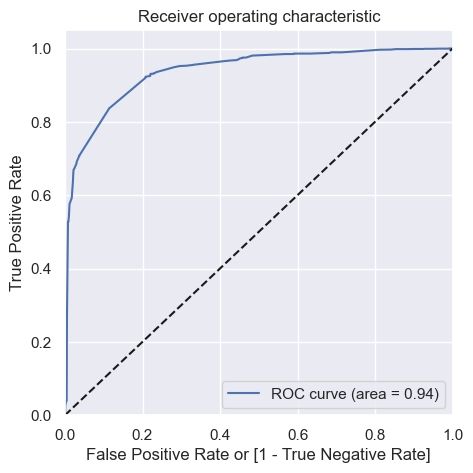

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

- The ROC Curve should be a value close to 1. We are getting a good value of **0.94** indicating a good predictive model.

## Step 8 - Finding Optimal Cutoff point
- Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

In [109]:
# Predicting Convert status with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convert_Prob  LeadID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0          0      0.354579    6597          0    1    1    1    1    0    0    0    0    0    0
1          1      0.967981    4934          1    1    1    1    1    1    1    1    1    1    1
2          0      0.055427    9042          0    1    0    0    0    0    0    0    0    0    0
3          0      0.200758    5680          0    1    1    1    0    0    0    0    0    0    0
4          1      0.003254    5367          0    1    0    0    0    0    0    0    0    0    0

##### Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs.

In [110]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378293  1.000000  0.000000
0.1   0.1  0.712631  0.968540  0.556917
0.2   0.2  0.801333  0.950923  0.710311
0.3   0.3  0.841638  0.922819  0.792241
0.4   0.4  0.867344  0.837668  0.885401
0.5   0.5  0.866074  0.707215  0.962736
0.6   0.6  0.864170  0.690436  0.969883
0.7   0.7  0.860520  0.667366  0.978050
0.8   0.8  0.849413  0.635487  0.979581
0.9   0.9  0.829102  0.566695  0.988770


#### Plotting Accuracy, Sensitivity and Specificity for various probabilities

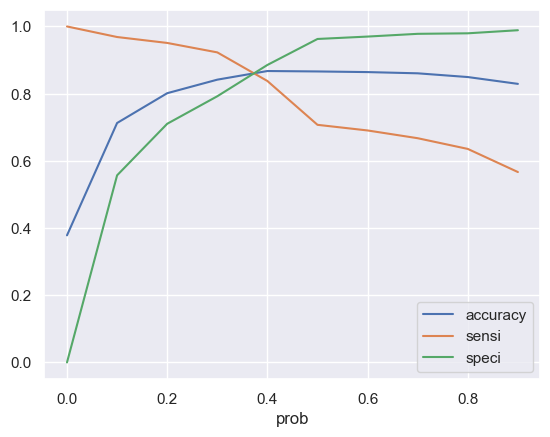

In [111]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### - *From the curve above, 0.38 is the optimum point to take it as a cutoff probability.*

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

Converted  Convert_Prob  LeadID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  final_predicted
0          0      0.354579    6597          0    1    1    1    1    0    0    0    0    0    0                0
1          1      0.967981    4934          1    1    1    1    1    1    1    1    1    1    1                1
2          0      0.055427    9042          0    1    0    0    0    0    0    0    0    0    0                0
3          0      0.200758    5680          0    1    1    1    0    0    0    0    0    0    0                0
4          1      0.003254    5367          0    1    0    0    0    0    0    0    0    0    0                0

#### Assigning "Lead Score" to the final predicted values using final model on Train data

In [113]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.38 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

Converted  Convert_Prob  LeadID  Convert_predicted  Lead_Score
0          0      0.354579    6597                  0          35
1          1      0.967981    4934                  1          97
2          0      0.055427    9042                  0           6
3          0      0.200758    5680                  0          20
4          1      0.003254    5367                  0           0

### - Checking Predicted final conversion rate on Train data set

In [114]:
new_conversion_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','Convert_predicted']]
new_conversion_df['Convert_predicted'].value_counts()

1    1999
0     385
Name: Convert_predicted, dtype: int64

In [115]:
conversion_ratio = (1999/float(1999+385))
print(conversion_ratio)

0.8385067114093959


- **The final predicted Conversion Ratio using final logistic regression model is approximately 84%, which is a good value as X education was aimimg to have atleast 80% conversion.**

##### Accuracy Score for Train data set

In [116]:
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted)
print(Accuracy * 100)

86.68676610599809


##### Confusion Matrix

In [117]:
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted )
confusion_train

array([[3464,  454],
       [ 385, 1999]])

In [118]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [119]:
# Sensitivity of our logistic regression model
Sensitivity = TP / float(TP+FN)
print("Sensitivity - ", round(Sensitivity*100,2))

# Specificity
Specificity = TN / float(TN+FP)
print("Specificity - ", round(Specificity*100,2))

# Calculate false postive rate - predicting churn when customer does not have churned
FPR = FP/ float(TN+FP)
print("False positive rate - ", round(FPR*100,2))

# Positive predictive value 
PPV = TP / float(TP+FP)
print("Positive predictive value - ", round(PPV*100,2))

# Negative predictive value
NPV = TN / float(TN+ FN)
print("Negative predictive value - ", round(NPV*100,2))

Sensitivity -  83.85
Specificity -  88.41
False positive rate -  11.59
Positive predictive value -  81.49
Negative predictive value -  90.0


##### Inference:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

- Accuracy : 86.68%
- Sensitivity :83.85%
- Specificity : 88.41%

Some of the other Stats are also derived above, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

### - Precision and Recall for Train data set

In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted )
confusion

array([[3464,  454],
       [ 385, 1999]])

In [121]:
# Precision
Precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
print("Precision = ", Precision)

Precision =  0.8149205055034652


In [122]:
# Recall
Recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
print("Recall = ", Recall)

Recall =  0.8385067114093959


### - Precision and Recall Tradeoff

In [123]:
y_train_pred_final.Converted, y_train_pred_final.Convert_predicted

(0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6297    0
 6298    0
 6299    0
 6300    1
 6301    1
 Name: Converted, Length: 6302, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6297    0
 6298    0
 6299    0
 6300    1
 6301    1
 Name: Convert_predicted, Length: 6302, dtype: int64)

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

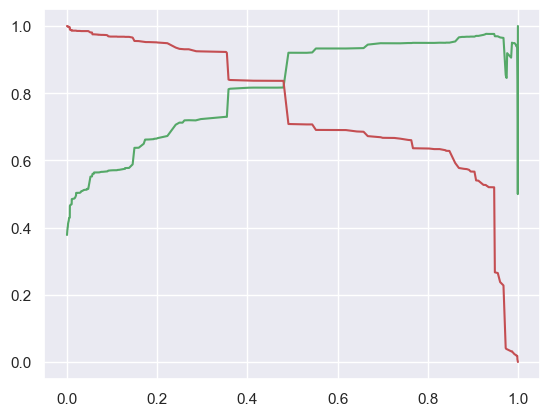

In [125]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Inference:
- With Sensitivity-Specificity-Accuracy plot, we are getting 0.38 optimum value for cutoff probability while In Precision-Recall Curve 0.48 looks optimal.

- **We are taking 0.38 as the optimum point as a cutoff probability and assigning Lead Score in training and test data.**

## Step 9 - Making predictions on the Test data set

- Since we have finalised the model and calculated the evaluation metrics of fianl model, it's time to validate the final model on the test data set. Before predicting the values on test data set we have to prepare the test data set similar to train set in order to get aligned results. 
- First scaling will be performed on the test data and then it will be divided into X & y sets.

In [126]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Lead Origin_Landing Page Submission  Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other_source  Lead Source_Referral Sites  Last Activity_Email Bounced  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  Last Activity_Page Visited on Website  Last Activity_Unreachable  Specialization_Business Administration  Specialization_E-Business  Specialization_E-COMMERCE  Specialization_Finance Management  Specialization_Healthcare Management  Specialization_Hospitality Management  Specialization_Human Resource Management  Specialization_IT Projects Management  Specialization_International Business  Specialization_Marketing Management  Specialization_Media and Advertising  Specialization_Not Provided  Specialization_Operations Management  Specialization_Retail Management  \
1256     0.262879                    -0.741284             -0.166751                                    1                        0                   1                       0                           0                         0                           0                            0                                        0                                      0                             0                                      0                          0                                       1                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                            0                                     0                                 0   
7415     0.262879                    -0.744950              0.800540                                    1                        0                   1                       0                           0                         0                           0                            0                                        0                                      0                             0                                      0                          0                                       0                          0                          0                                  0                                     0                                      0                                         0                                      0                                      0                                    0                                     0                            0                                     1                                 0   
7099     0.262879                     0.745546              0.800540                                    1                        0                   1                       0                           0                         0                           0                            0                                        0                                      0                             0                                      0                          0                                       0                          0                          0                                  0                                     0                                      0                                         1                                      0                                      0                                    0                                     0                            0                                     0                                 0   
8918     0.935363                     0.041548              1.767830                                    1                        0        

In [127]:
X_test = X_test[col]
X_test.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Import  Lead Source_Other_source  Lead Source_Referral Sites  Last Activity_Email Bounced  Last Activity_Olark Chat Conversation  Tags_Busy  Tags_Interested  in full time MBA  Tags_Interested in other courses  Tags_Lost to EINS  Tags_Ringing  Tags_Will revert after reading the email  Tags_invalid number  Tags_switched off  Lead Quality_Not Sure  Lead Quality_Worst  Last Notable Activity_Modified  Last Notable Activity_Page Visited on Website
1256                                    1                        0                         0                           0                            0                                      0          0                                  0                                 0                  0             0                                         1                    0                  0                      1                   0                               0                                              0
7415                                    1                        0                         0                           0                            0                                      0          0                                  0                                 0                  0             0                                         0                    0                  0                      0                   1                               1                                              0
7099                                    1                        0                         0                           0                            0                                      0          0                                  0                                 0                  0             0                                         1                    0                  0                      0                   0                               0                                              0
8918                                    1                        0                         0                           0                            0                                      0          0                                  0                                 0                  0             1                                         0                    0                  0                      1                   0                               0                                              0
8825                                    0                        0                         0                           0                            0                                      0          0                                  0                                 0                  0             0                                         0                    0                  0                      0                   1                               0                                              0

In [128]:
X_test_sm = sm.add_constant(X_test)

In [129]:
y_test_pred = res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

1256    0.354579
7415    0.006346
7099    0.947344
8918    0.006224
8825    0.033433
8047    0.848060
828     0.003290
729     0.354579
5846    0.354579
2576    0.354579
dtype: float64

In [131]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

0
1256  0.354579
7415  0.006346
7099  0.947344
8918  0.006224
8825  0.033433

In [132]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [133]:
# Putting Lead Number to index
y_test_df['LeadID'] = y_test_df.index

In [134]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

Converted  LeadID         0
0          0    1256  0.354579
1          0    7415  0.006346
2          1    7099  0.947344
3          0    8918  0.006224
4          0    8825  0.033433

In [137]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [138]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  LeadID  Convert_Prob
0          0    1256      0.354579
1          0    7415      0.006346
2          1    7099      0.947344
3          0    8918      0.006224
4          0    8825      0.033433

In [139]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

Converted  LeadID  Convert_Prob  final_predicted
0          0    1256      0.354579                0
1          0    7415      0.006346                0
2          1    7099      0.947344                1
3          0    8918      0.006224                0
4          0    8825      0.033433                0

### - Assigning Lead Score

In [140]:
y_pred_final = y_pred_final.iloc[:, :3]
y_pred_final['Convert_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.38 else 0)

y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted  LeadID  Convert_Prob  Convert_predicted  Lead_Score
0          0    1256      0.354579                  0          35
1          0    7415      0.006346                  0           1
2          1    7099      0.947344                  1          95
3          0    8918      0.006224                  0           1
4          0    8825      0.033433                  0           3

### - Checking Predicted final conversion rate on Test data set

In [141]:
test_conversion_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Convert_predicted']]
test_conversion_df['Convert_predicted'].value_counts()

1    865
0    174
Name: Convert_predicted, dtype: int64

In [142]:
conversion_ratio = round(865/float(865+174),4)
print(conversion_ratio)

0.8325


##### Predicted conversion rate on test data set is 83.25% which is almost same as that of Train data set

### - Evaluating Metrics for Test data

In [143]:
# Overall accuracy.
Accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Convert_predicted)
print(Accuracy*100)

86.23242042931162


In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Convert_predicted )
confusion2

array([[1465,  198],
       [ 174,  865]])

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
Sensitivity = TP / float(TP+FN)
print("Sensitivity - ", Sensitivity*100)

Sensitivity -  83.2531280076997


In [147]:
# Let us calculate specificity
Specificity = TN / float(TN+FP)
print("Specificity - ", Specificity*100)

Specificity -  88.09380637402285


In [148]:
# Precision for test data
Precision_test = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
print("Precision = ", Precision_test)

Precision =  0.8137347130761995


In [149]:
# Recall for test data
Recall_test = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
print("Recall = ", Recall_test)

Recall =  0.8325312800769971


## Step 10 - Final Report

#### Metrics for Train Data

 - *Accuracy* : 86.68%
 - *Sensitivity* : 83.85%
 - *Specificity* : 88.41%
 - *Precision* : 81.50%
 - *Recall* : 83.92%

#### Metrics for Test Data

- *Accuracy* : 86.23%
- *Sensitivity* : 83.25%
- *Specificity* : 88.09%
- *Precision* : 81.43%
- *Recall* : 83.31%

- **Actual Conversion Ratio = 38.02%** 

- **Predicted Conversion Ratio = 83.25%**

##### Conclusions:
- We have build this Logistic regression model to predict the convert probability of incoming leads based on a cutoff value.
- The final model has 18 features predicting the target variable.
- Optimum cutoff was obtained from Sensitivity-Specificity-Accuracy plot and value was chosen as **0.38**.
- So, any lead with greater than 0.38 of convert probability will be treated as Hot Lead (customer will convert) and lead with convert prob less than 0.38 will be taken as Cold lead.
- The final **Convesrion Ratio** calculated on test data set is approx **83%** which is quite good as X education wanted an expected value around 80%.
- **Accuracy, Sensitivity and Specificity** values of test data set are around **87%, 83% and 88%** respectively.
- The final model has Sensitivity of around 83%, which means the model is able to predict 83% customers out of all the converted customers.
- As per final model (Logm4) the top predictor variables are:
    - Tags_Lost to EINS
    - Lead Source_Other_source
    - Tags_Busy

End